In [1]:
%cd ../

/home/zulqarnain/develop/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils
import htfa_torch.htfa as HTFA

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/utils/deprecation.py

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
from scipy.spatial import distance
from scipy import stats
import nilearn.plotting as niplot
import statsmodels.stats.multitest as smt
from ordered_set import OrderedSet
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import LeaveOneGroupOut, cross_val_score,StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif,SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_roc_curve

In [5]:
import matplotlib
import matplotlib.pyplot as pl
from matplotlib import cycler
from seaborn.apionly import color_palette
column_width = 3.3
page_width = 6.7
# colorblind-friendly colors 
# source: https://personal.sron.nl/~pault/
colors = {
    'bright': ['4477AA', 
               '66CCEE', 
               '228833', 
               'CCBB44', 
               'EE6677', 
               'AA3377', 
               'BBBBBB'],
    'high_contrast': ['FFFFFF', 
                      'DDAA33', 
                      'BB5566', 
                      '004488', 
                      '00000'],
    'vibrant': ['0077BB', 
                '33BBEE', 
                '0099BB',
                'EE7733',
                'CC3311',
                'EE3377',
                'BBBBBB'],
    'muted': ['332288',
              '88CCEE',
              '44AA99',
              '117733',
              '999933',
              'DDCC77',
              'CC6677',
              '882255',
              'AA4499']
}
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=(column_width, 
                         0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=8)


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/zulqarnain

In [6]:
%matplotlib inline

In [7]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [8]:
lepping_db = niidb.FMriActivationsDb('data/sound_depression.db', mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz')

In [9]:
dtfa = DTFA.DeepTFA([b for b in lepping_db.all() if 'response' not in b.task and 'tones' not in b.task],
                    mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz',num_factors=100, embedding_dim=2)

02/06/2020 12:37:47 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:37:48 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:37:49 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:37:51 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

02/06/2020 12:38:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:38:25 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:38:26 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:38:27 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

02/06/2020 12:39:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:01 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:02 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:03 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

02/06/2020 12:39:37 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:38 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:40 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:39:41 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

02/06/2020 12:40:16 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:17 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:18 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:20 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

02/06/2020 12:40:54 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:55 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:56 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:40:57 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [10]:
dtfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_042320')

In [11]:
dtfa.num_voxels

62733

In [12]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis([b for b in lepping_db.all() if b.task not in ['response', 'tones']], mask='/home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz', num_factors=100)

02/06/2020 12:41:56 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:41:57 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:41:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:41:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control01

02/06/2020 12:42:32 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:42:33 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:42:34 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:42:36 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control08

02/06/2020 12:43:07 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:09 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run2_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:10 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15_run4_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:11 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-control15

02/06/2020 12:43:43 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:45 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:46 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:43:47 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd02_run4_music_m

02/06/2020 12:44:20 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run5_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:44:22 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd09_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:44:23 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run3_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:44:24 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd10_run2_music_mc_MNI_

02/06/2020 12:44:58 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd16_run4_music_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:44:59 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run1_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:45:00 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run2_nonmusic_mc_MNI_masked.nii.gz with mask /home/zulqarnain/fmri_data/Sound_Depression_Final/mask/sound_depression_mask_MNI152.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
02/06/2020 12:45:01 Loading Nifti image /home/zulqarnain/fmri_data/Sound_Depression_Final/nifti_files/sub-mdd17_run5_music_m

In [13]:
htfa.load_state('data/lepping_noresponse_restz_k100_n1000_01302020_233405')

In [14]:
validation_filter = lepping_db.inference_filter(training=False)
validation_blocks = [b for (b, block) in enumerate(dtfa._blocks) if validation_filter(block)]

In [15]:
def task_labeler(task):
    if task == 'negative_music':
        task = 'negative_music'
    elif task == 'positive_music':
        task = 'positive_music'
    elif task == 'negative_nonmusic':
        task = 'negative_sounds'
    elif task == 'positive_nonmusic':
        task = 'positive_sounds'
    else:
        task = task.capitalize()
    return task

def music_sound_labeler(task):
    if 'music' in task_labeler(task):
        return 'music'
    elif 'sounds' in task_labeler(task):
        return 'sounds'
    
def positive_negative_labeler(task):
    if 'negative' in task_labeler(task):
        return 'negative'
    elif 'positive' in task_labeler(task):
        return 'positive'
    
def block_task_labeler(block):
    return task_labeler(block.task)

def block_music_sound_labeler(block):
    return music_sound_labeler(block.task)

def block_positive_negative_labeler(block):
    return positive_negative_labeler(block.task)

In [16]:
def subject_labeler(subject):
    return subject

def block_subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_condition_labeler(subject):
    subject_regex = re.compile("([A-Za-z]+)([0-9]{1,2})")
    m = subject_regex.search(subject)
    condition, sub_num = m.groups()
    if condition == 'mdd':
        condition = 'Major Depressive'
    elif condition == 'control':
        condition = 'Control'
    return '%s Participant %d' % (condition, int(sub_num))

In [17]:
def classification_pipeline(data,targets,session_labels,cv=LeaveOneGroupOut(),
                                 scoring="roc_auc",feature_select=False,
                            feature_selection=SelectPercentile(f_classif, percentile=5),print_all=True):
    categories = np.unique(targets)
    overall_result = []
    overall_result_chance = []
    category_result = {key:None for key in categories}
    for category in categories:
        print("Processing %s" % (category))
        dummy_classifier = DummyClassifier()
        classification_target = [t==category for t in targets]
        svc = SVC(C=1., kernel="linear",probability=True,random_state=42)
        if feature_select:
            classification_target = np.array(classification_target)
            result = []
            result_chance = []
            for train_ind, test_ind in cv.split(data,classification_target,groups=session_labels):
#                 print("TRAIN:", train_ind, "TEST:", test_ind)
                train_ind = np.array(train_ind).astype(int)
                test_ind = np.array(test_ind).astype(int)
                training_labels = classification_target[train_ind]
                testing_labels = classification_target[test_ind]
                train_feature_classif = feature_selection.fit(data[train_ind],training_labels)
                training_data = train_feature_classif.transform(data[train_ind])
                testing_data = train_feature_classif.transform(data[test_ind])

                train_svc = svc.fit(training_data,training_labels)
                train_dummy = dummy_classifier.fit(training_data,training_labels)
                viz = plot_roc_curve(train_svc,testing_data,testing_labels)
                result.append(viz.roc_auc)
                pl.close()
                viz = plot_roc_curve(train_dummy,testing_data,testing_labels)
                result_chance.append(viz.roc_auc)
                pl.close()
        else:
            classifier = svc
            result = cross_val_score(
                classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )

            result_chance = cross_val_score(
                dummy_classifier,
                data,
                classification_target,
                cv=cv,
                groups=session_labels,
                scoring="roc_auc",
            )
        result = np.array(result)
        result_chance = np.array(result_chance)
        category_result[category] = result
        overall_result.extend(result)
        overall_result_chance.extend(result_chance)
        if print_all:
            print("Scores: %1.4f +- %1.4f" % (
                result.mean(),
                result.std()))

            print("Chance Scores: %1.4f +- %1.4f" % (
                result_chance.mean(),
                result_chance.std()))
    
    if print_all:
        print ('...')
        print("Overall Score: %1.4f +- %1.4f" % (
        np.array(overall_result).mean(),
        np.array(overall_result).std()))

        print("Overall Dummy Score: %1.4f +- %1.4f" % (
        np.array(overall_result_chance).mean(),
        np.array(overall_result_chance).std()))

        print ("\n")
    return overall_result,overall_result_chance,category_result

In [18]:
dtfa_hyperparams = dtfa.variational.hyperparams.state_vardict()
all_weights_dtfa = dtfa_hyperparams['weights']['mu'].data.numpy()
all_weights_htfa = htfa.enc.hyperparams.block__weights__mu.data.numpy()
confidence = 0.95

In [19]:
### task classification using 5Fold CV on NTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            #if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(music_sound_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

ntfa_mus_sounds_summary_means = ntfa_summary_means
dummy_mus_sounds_summary_means = dummy_summary_means

Processing Subject control01
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.1871
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.2915
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3000 +- 0.2449


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.2500 +- 0.3162
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.4000 +- 0.3391


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.2750


Processing Subject control04
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.3391
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.3437


Processing Subject mdd15
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.6000 +- 0.2550
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.2449
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5750 +- 0.2512


Processing Subject mdd16
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3536


Processing Subject mdd17
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.2449
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5250 +- 0.3052


Processing Subject mdd18
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.5500 +- 0.2915
Processing sounds


In [20]:
### task classification using 5Fold CV on HTFA music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_music_sound_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_mus_sounds_summary_means = htfa_summary_means

Processing Subject control01
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5000 +- 0.2236
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.6500 +- 0.2000
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.5750 +- 0.2250


Processing Subject control02
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.2449
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.6000 +- 0.3202


Processing Subject control03
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3000 +- 0.3674
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.3250 +- 0.3172


Processing Subject control04
Processing music
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 0.8500 +- 0.2000
Overall Dummy Score: 0.4

Scores: 1.0000 +- 0.0000
Chance Scores: 0.3500 +- 0.1225
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.1871


Processing Subject mdd17
Processing music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2915
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4750 +- 0.2610


Processing Subject mdd18
Processing music
Scores: 0.4500 +- 0.4000
Chance Scores: 0.4500 +- 0.1871
Processing sounds
Scores: 0.4500 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
...
Overall Score: 0.4500 +- 0.4000
Overall Dummy Score: 0.3750 +- 0.2305


Processing Subject mdd19
Processing music
Scores: 0.8500 +- 0.3000
Chance Scores: 0.6500 +- 0.3391
Processing sounds
Scores: 0.8500 +- 0.3000
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.5250 +- 0.3250


...
HTFA Summary Score Across Subjects, Fo

In [21]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectPercentile(f_classif, percentile=5)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.2500 +- 0.2739
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.5500 +- 0.4000
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.3742


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.3674
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.3674


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Proc

Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.2000
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4250 +- 0.2250


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2550
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.2291


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.2000
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.7500 +- 0.2739
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.7000 +- 0.244

In [22]:
### task classification using 5Fold CV on input data music vs sounds###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(music_sound_labeler(block.task))
        print(targets)
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                    feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['music','sounds']}
for c in ['music','sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_mus_sounds_summary_means = voxel_summary_means

Processing Subject control01
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5500 +- 0.3317
Processing sounds
Scores: 0.8500 +- 0.3000
Chance Scores: 0.5000 +- 0.2236
...
Overall Score: 0.8500 +- 0.3000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control02
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.9000 +- 0.2000
Chance Scores: 0.7000 +- 0.1871
Processing sounds
Scores: 0.9000 +- 0.2000
Chance Scores: 0.8000 +- 0.1000
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.7500 +- 0.1581


Processing Subject control03
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Proc

Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2236
Processing sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4000 +- 0.3742
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4500 +- 0.3122


Processing Subject mdd02
['sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'music']
Processing music
Scores: 0.9500 +- 0.1000
Chance Scores: 0.2500 +- 0.2739
Processing sounds
Scores: 0.9500 +- 0.1000
Chance Scores: 0.3000 +- 0.2915
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.2750 +- 0.2839


Processing Subject mdd03
['music', 'music', 'music', 'music', 'music', 'music', 'music', 'music', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds', 'sounds']
Processing music
Scores: 0.8000 +- 0.4000
Chance Scores: 0.3500 +- 0.2550
Processing sounds
Scores: 0.8000 +- 0.4000
Chance Scores: 0.6500 +- 0.3391
...
Overall Score: 0.8000 +- 0.4000
Overall Dummy Score: 0.5000 +- 0.335

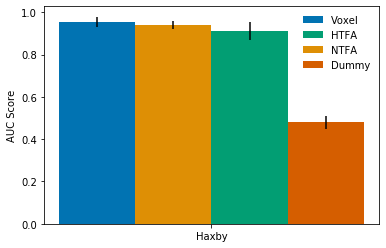

In [23]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_result) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))
pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [24]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=21.23241850997604, pvalue=3.3056154307537565e-33)

In [25]:
### task classification using 5Fold CV on NTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means
ntfa_pos_neg_summary_means = ntfa_summary_means
dummy_pos_neg_summary_means = dummy_summary_means

Processing Subject control01
Processing negative
Scores: 0.3500 +- 0.3742
Chance Scores: 0.6000 +- 0.2000
Processing positive
Scores: 0.3500 +- 0.3742
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 0.3500 +- 0.3742
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject control02
Processing negative
Scores: 0.9500 +- 0.1000
Chance Scores: 0.4000 +- 0.3391
Processing positive
Scores: 0.9500 +- 0.1000
Chance Scores: 0.2500 +- 0.2236
...
Overall Score: 0.9500 +- 0.1000
Overall Dummy Score: 0.3250 +- 0.2969


Processing Subject control03
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.7000 +- 0.2915
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.7000 +- 0.1871
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.7000 +- 0.2449


Processing Subject control04
Processing negative
Scores: 0.5000 +- 0.4472
Chance Scores: 0.6000 +- 0.3000
Processing positive
Scores: 0.5000 +- 0.4472
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.5000 +- 0.4472
Over

Scores: 0.3500 +- 0.3000
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.3500 +- 0.3000
Overall Dummy Score: 0.3500 +- 0.2784


Processing Subject mdd16
Processing negative
Scores: 0.4000 +- 0.3742
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.4000 +- 0.3742
Chance Scores: 0.7000 +- 0.2449
...
Overall Score: 0.4000 +- 0.3742
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject mdd17
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.3500 +- 0.2550
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.8000 +- 0.1000
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5750 +- 0.2969


Processing Subject mdd18
Processing negative
Scores: 0.7500 +- 0.2236
Chance Scores: 0.7500 +- 0.2236
Processing positive
Scores: 0.7500 +- 0.2236
Chance Scores: 0.3000 +- 0.2915
...
Overall Score: 0.7500 +- 0.2236
Overall Dummy Score: 0.5250 +- 0.3437


Processing Subject mdd19
Processing negative
Scores: 0.3000 +- 0.4000
Chance Scores: 0.5000 +- 0.3162


In [26]:
### task classification using 5Fold CV on HTFA positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_positive_negative_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means
htfa_pos_neg_summary_means = htfa_summary_means


Processing Subject control01
Processing negative
Scores: 0.6500 +- 0.3000
Chance Scores: 0.5000 +- 0.3536
Processing positive
Scores: 0.6500 +- 0.3000
Chance Scores: 0.7500 +- 0.1581
...
Overall Score: 0.6500 +- 0.3000
Overall Dummy Score: 0.6250 +- 0.3010


Processing Subject control02
Processing negative
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6500 +- 0.2550
Processing positive
Scores: 0.8000 +- 0.2449
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.8000 +- 0.2449
Overall Dummy Score: 0.6250 +- 0.2562


Processing Subject control03
Processing negative
Scores: 0.6500 +- 0.3742
Chance Scores: 0.4500 +- 0.2915
Processing positive
Scores: 0.6500 +- 0.3742
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.6500 +- 0.3742
Overall Dummy Score: 0.4000 +- 0.2784


Processing Subject control04
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4500 +- 0.3674
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.3500 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Over

Scores: 0.2000 +- 0.4000
Chance Scores: 0.3000 +- 0.1000
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.4500 +- 0.2915
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.3750 +- 0.2305


Processing Subject mdd16
Processing negative
Scores: 0.5500 +- 0.4000
Chance Scores: 0.7000 +- 0.2449
Processing positive
Scores: 0.5500 +- 0.4000
Chance Scores: 0.3000 +- 0.2449
...
Overall Score: 0.5500 +- 0.4000
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject mdd17
Processing negative
Scores: 0.7000 +- 0.2449
Chance Scores: 0.2500 +- 0.2236
Processing positive
Scores: 0.7000 +- 0.2449
Chance Scores: 0.4500 +- 0.1871
...
Overall Score: 0.7000 +- 0.2449
Overall Dummy Score: 0.3500 +- 0.2291


Processing Subject mdd18
Processing negative
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5500 +- 0.2915
Processing positive
Scores: 0.9000 +- 0.2000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.9000 +- 0.2000
Overall Dummy Score: 0.5250 +- 0.2839


Processing Subject mdd19


In [27]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.3500 +- 0.3391
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.3750 +- 0.3010


Processing Subject control02
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.7000 +- 0.1871
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4000 +- 0.2550
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control03
Processing negative
Scores: 0.6000 +- 0.2000
Chance Scores: 0.6500 +- 0.2550
Processing positive
Scores: 0.6000 +- 0.2000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.6000 +- 0.2000
Overall Dummy Score: 0.5500 +- 0.2693


Processing Subject control04
Processing negative
Scores: 0.7000 +- 0.4000
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.7000 +- 0.4000
Chance Scores: 0.4500 +- 0.2449
...
Overall Score: 0.7000 +- 0.4000
Over

Scores: 0.3000 +- 0.4000
Chance Scores: 0.3000 +- 0.1871
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.5500 +- 0.1871
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.4250 +- 0.2250


Processing Subject mdd15
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.5000 +- 0.3536
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.5000 +- 0.2739
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.5000 +- 0.3162


Processing Subject mdd16
Processing negative
Scores: 0.2500 +- 0.3873
Chance Scores: 0.5500 +- 0.1871
Processing positive
Scores: 0.2500 +- 0.3873
Chance Scores: 0.5500 +- 0.3674
...
Overall Score: 0.2500 +- 0.3873
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject mdd17
Processing negative
Scores: 0.5500 +- 0.1000
Chance Scores: 0.4000 +- 0.2000
Processing positive
Scores: 0.5500 +- 0.1000
Chance Scores: 0.4000 +- 0.2000
...
Overall Score: 0.5500 +- 0.1000
Overall Dummy Score: 0.4000 +- 0.2000


Processing Subject mdd18


In [28]:
### task classification using 5Fold CV on input data positive vs negative###
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(positive_negative_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['positive','negative']}
for c in ['positive','negative']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means
voxel_pos_neg_summary_means = voxel_summary_means


Processing Subject control01
Processing negative
Scores: 0.4500 +- 0.3317
Chance Scores: 0.4500 +- 0.2449
Processing positive
Scores: 0.4500 +- 0.3317
Chance Scores: 0.6500 +- 0.3000
...
Overall Score: 0.4500 +- 0.3317
Overall Dummy Score: 0.5500 +- 0.2915


Processing Subject control02
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.4000 +- 0.3742
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.5500 +- 0.2915
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.4750 +- 0.3437


Processing Subject control03
Processing negative
Scores: 0.6000 +- 0.3742
Chance Scores: 0.5500 +- 0.3674
Processing positive
Scores: 0.6000 +- 0.3742
Chance Scores: 0.6000 +- 0.2550
...
Overall Score: 0.6000 +- 0.3742
Overall Dummy Score: 0.5750 +- 0.3172


Processing Subject control04
Processing negative
Scores: 0.8500 +- 0.2000
Chance Scores: 0.2500 +- 0.3162
Processing positive
Scores: 0.8500 +- 0.2000
Chance Scores: 0.4500 +- 0.3317
...
Overall Score: 0.8500 +- 0.2000
Over

Scores: 0.3000 +- 0.4000
Chance Scores: 0.2000 +- 0.1871
Processing positive
Scores: 0.3000 +- 0.4000
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.3000 +- 0.4000
Overall Dummy Score: 0.3500 +- 0.3202


Processing Subject mdd15
Processing negative
Scores: 0.5000 +- 0.3162
Chance Scores: 0.3000 +- 0.2915
Processing positive
Scores: 0.5000 +- 0.3162
Chance Scores: 0.6000 +- 0.1225
...
Overall Score: 0.5000 +- 0.3162
Overall Dummy Score: 0.4500 +- 0.2693


Processing Subject mdd16
Processing negative
Scores: 0.2000 +- 0.4000
Chance Scores: 0.4500 +- 0.2915
Processing positive
Scores: 0.2000 +- 0.4000
Chance Scores: 0.6000 +- 0.3000
...
Overall Score: 0.2000 +- 0.4000
Overall Dummy Score: 0.5250 +- 0.3052


Processing Subject mdd17
Processing negative
Scores: 0.4750 +- 0.2784
Chance Scores: 0.6000 +- 0.3391
Processing positive
Scores: 0.4250 +- 0.2179
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.4500 +- 0.2512
Overall Dummy Score: 0.5500 +- 0.3500


Processing Subject mdd18


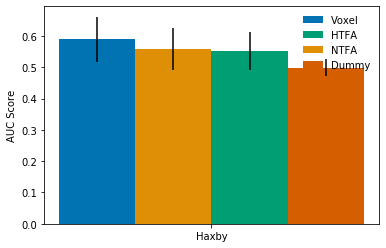

In [29]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [30]:
stats.ttest_ind(ntfa_summary_means,dummy_summary_means)

Ttest_indResult(statistic=1.705208865843812, pvalue=0.09235031813383944)

In [31]:
### task classification using 3Fold CV on NTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
Scores: 0.2917 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.6458 +- 0.3261
Overall Dummy Score: 0.5104 +- 0.2308


Processing Subject control02
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.3118
Processing positive_music
Scores: 0.7917 +- 0.1559
Chance Scores: 0.8333 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.8333 +- 0.1932
Overall Dummy Score: 0.5625 +- 0.2909


Processing Subject control03
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
Processing

Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.2917 +- 0.0589
...
Overall Score: 0.6354 +- 0.3123
Overall Dummy Score: 0.3958 +- 0.1233


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.7917 +- 0.2946
...
Overall Score: 0.5625 +- 0.3404
Overall Dummy Score: 0.6875 +- 0.2421


Processing Subject mdd03
Processing negative_music
Scores: 0.4444 +- 0.3425
Chance Scores: 0.6944 +- 0.1288
Processing negative_sounds
Scores: 0.8889 +- 0.1571
Chance Scores: 0.5694 +- 0.1534
Processing positive_music
Scores: 0.5556 +- 0.4157
Chance Scores: 0.5139 

In [32]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
Scores: 0.3750 +- 0.2700
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.8750 +- 0.1021
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.7708 +- 0.3012
Overall Dummy Score: 0.6667 +- 0.2244


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.7188 +- 0.2608
Overall Dummy Score: 0.4688 +- 0.2232


Processing Subject control03
Processing negative_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3333 +- 0.0589
Processing

Scores: 0.4583 +- 0.3864
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.6667 +- 0.2946
...
Overall Score: 0.5833 +- 0.3076
Overall Dummy Score: 0.5000 +- 0.2041


Processing Subject mdd01
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5833 +- 0.1559
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.6250 +- 0.3461
Overall Dummy Score: 0.4792 +- 0.1680


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.2917 +- 0.0589
Processing positive_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.7083 +- 0.0589
Chance Scores: 0.3750

In [33]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6458 +- 0.3097
Overall Dummy Score: 0.4688 +- 0.2173


Processing Subject control02
Processing negative_music
Scores: 0.7083 +- 0.1559
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.7500 +- 0.1768
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.7292 +- 0.2740
Overall Dummy Score: 0.6354 +- 0.2192


Processing Subject control03
Processing negative_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.4583 +- 0.1179
Processing

Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.3281
...
Overall Score: 0.7188 +- 0.2801
Overall Dummy Score: 0.5208 +- 0.2094


Processing Subject mdd01
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1559
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2946
Processing positive_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.5625 +- 0.3836
Overall Dummy Score: 0.4375 +- 0.1804


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.5833

In [34]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.8750 +- 0.1021
...
Overall Score: 0.6354 +- 0.3364
Overall Dummy Score: 0.4896 +- 0.2418


Processing Subject control02
Processing negative_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5833 +- 0.3281
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.5833 +- 0.2569
...
Overall Score: 0.7500 +- 0.2339
Overall Dummy Score: 0.4792 +- 0.2438


Processing Subject control03
Processing negative_music
Scores: 0.1250 +- 0.1021
Chance Scores: 0.4167 +- 0.1179
Processing

Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.8333 +- 0.2619
Overall Dummy Score: 0.4688 +- 0.1702


Processing Subject control20
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.7500 +- 0.1021
Processing positive_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.7083 +- 0.2357
Processing positive_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.6771 +- 0.2625
Overall Dummy Score: 0.6562 +- 0.1985


Processing Subject mdd01
Processing negative_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.5521 +- 0.3661
Overall Dummy Score: 0.5521 +- 0.

Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.7188 +- 0.2049
Overall Dummy Score: 0.5625 +- 0.1731


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.7113 +- 0.2915
Voxel Summary Score Across Subjects, For Category positive_music : 0.6674 +- 0.2722
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.6502 +- 0.2935
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.6831 +- 0.3072
...
Voxel Summary Score Across Subjects, Across Tasks: 0.6780 +- 0.2922
Overall Dummy Score: 0.49 +- 0.23
...
Voxel Summary Mean/SE, Across Tasks: 0.6780 +- 0.0364


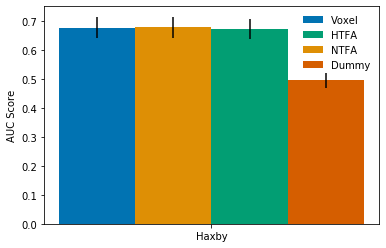

In [35]:
confidence = 0.95
voxel_accuracies = np.mean(voxel_summary_means)
voxel_errs = stats.sem(voxel_summary_means) * stats.t.ppf((1 + confidence) / 2, len(voxel_summary_means) - 1)
htfa_accuracies = np.mean(htfa_summary_means)
htfa_errs = stats.sem(htfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(htfa_summary_means) - 1)
ntfa_accuracies = np.mean(ntfa_summary_means)
ntfa_errs = stats.sem(ntfa_summary_means) * stats.t.ppf((1 + confidence) / 2, len(ntfa_summary_means) - 1)
dummy_accuracies = np.mean(dummy_summary_means)
dummy_errs = stats.sem(dummy_summary_means) * stats.t.ppf((1 + confidence) / 2, len(dummy_summary_means) - 1)

datasets = ['Haxby'] #, 'Word', 'Rest']

xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.2

fig = pl.figure()
voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + bar_width, height=ntfa_accuracies, color=colorblind_colors[1], width=bar_width, yerr=ntfa_errs)
htfa_bar = pl.bar(xs + 2*bar_width, height=htfa_accuracies, color=colorblind_colors[2], width=bar_width, yerr=htfa_errs)
dummy_bar = pl.bar(xs + 3*bar_width, height=dummy_accuracies, color=colorblind_colors[3], width=bar_width, yerr=dummy_errs)
pl.xticks(xs+1.5*bar_width, datasets)
pl.legend((voxel_bar[0], htfa_bar[0], ntfa_bar[0],dummy_bar[0]), ('Voxel', 'HTFA', 'NTFA','Dummy'))

pl.ylabel('AUC Score')
pl.ylim(bottom=0,)
fig.savefig('affvids_svm_accuracies_ci.pdf')

In [36]:
### task classification using 3Fold CV on NTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.4714
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.0833 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.2083 +- 0.3656


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +-

Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.2795


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3931


Processing Subject mdd17
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.4583 +- 0.3359


Processing Subject mdd18
Processing negative_music
Scores: 0.6667 

In [37]:
### task classification using 3Fold CV on HTFA music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_mus_summary_means = summary_subject_means
dummy_mus_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.0833 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.3997


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.2917 +- 0.3033


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.7500 +- 0.2041


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +-

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5833 +- 0.2357


Processing Subject mdd18
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.2764


Processing Subject mdd19
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5417 +- 0.1718


...
HTFA Summary Score Across Subjects, For Category negative_music : 0.5965 +- 0.4437
HTFA Summary Score Across Subjects, For Category positive_music : 0.5965 +- 0.4437
...
HTFA Summary Score Across Subjects, Across Tasks: 0.5965 +- 0.4437
Overall D

In [38]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.4249
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.6667 +- 0.3436


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.3333 +- 0.1179


Processing Subject control03
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.3227


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +-

Scores: 0.0000 +- 0.0000
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject mdd13
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.9167 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.7500 +- 0.2887


Processing Subject mdd14
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5000 +- 0.2500


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.0000 +- 0.0000
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.2917 +- 0.3656


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 

In [39]:
### task classification using 3Fold CV on Input data music, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('music' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music']}
for c in ['negative_music','positive_music']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_mus_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.0833 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject control02
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.4249
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.1667 +- 0.2357
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.2917 +- 0.3656


Processing Subject control03
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4167 +- 0.4249
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +-

Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.7500 +- 0.3819
Overall Dummy Score: 0.7083 +- 0.2244


Processing Subject mdd14
Processing negative_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
Processing positive_music
Scores: 0.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.4249
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject mdd15
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4583 +- 0.2244


Processing Subject mdd16
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3333 +- 0.3118
Processing positive_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.

In [40]:
### task classification using 3Fold CV on NTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_dtfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_sounds_summary_means = summary_subject_means
dummy_sounds_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.0000 +- 0.0000
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.1667 +- 0.2357


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5000 +- 0.2041


Processing Subject control03
Processing negative_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.5417 +- 0.3359


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

Scores: 0.3333 +- 0.4714
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.3333 +- 0.4714
Overall Dummy Score: 0.6250 +- 0.1909


Processing Subject mdd13
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.1179
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3146


Processing Subject mdd14
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.3333 +- 0.4714
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3656


Processing Subject mdd15
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.6667 +- 0.4714
Overall Dummy Score: 0.4583 +- 0.3359


Processing Subject mdd16
Processing negative_sounds
Scores: 

In [41]:
### task classification using 3Fold CV on HTFA sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(all_weights_htfa[i,:,:].mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

htfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
htfa_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject control02
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.3536
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 1.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3727


Processing Subject control03
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.0833 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.2083 +- 0.2244


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6667 +- 0.1863


Processing Subject mdd15
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6667 +- 0.2764


Processing Subject mdd16
Processing negative_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.8333 +- 0.1179
Processing positive_sounds
Scores: 0.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.3118
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.5833 +- 0.3436


Processing Subject mdd17
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5000 +- 0.3536
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Sc

In [42]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.1863


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.5833 +- 0.2764


Processing Subject control03
Processing negative_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
Processing positive_sounds
Scores: 0.3333 +- 0.2357
Chance Scores: 0.2500 +- 0.3536
...
Overall Score: 0.3333 +- 0.2357
Overall Dummy Score: 0.3333 +- 0.3436


Processing Subject control04
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.0833 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0

Scores: 0.0000 +- 0.0000
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.2917 +- 0.3656


Processing Subject mdd13
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.5000 +- 0.2887


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.8333 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6667 +- 0.2357


Processing Subject mdd15
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.8333 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject mdd16
Processing negative_sounds
Scores: 

In [43]:
### task classification using 3Fold CV on Input data sounds, negative vs positive###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
            if (block.subject == s) and ('sounds' in music_sound_labeler(block.task)):
                session_labels.append(block.run)
                data.append(dtfa.voxel_activations[i].data.numpy().mean(0))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select = True,
                                                                        feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_sounds','positive_sounds']}
for c in ['negative_sounds','positive_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("VoxelSummary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

voxel_summary_result = summary_result
dummy_summary_result = summary_result_chance
voxel_sounds_summary_means = summary_subject_means

Processing Subject control01
Processing negative_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.4082
Processing positive_sounds
Scores: 0.1667 +- 0.2357
Chance Scores: 0.2500 +- 0.2041
...
Overall Score: 0.1667 +- 0.2357
Overall Dummy Score: 0.3750 +- 0.3461


Processing Subject control02
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.4249
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.8333 +- 0.2357
Overall Dummy Score: 0.6250 +- 0.3461


Processing Subject control03
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.7083 +- 0.2668


Processing Subject control04
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.4249
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0

Scores: 0.0000 +- 0.0000
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.0000 +- 0.0000
Overall Dummy Score: 0.4167 +- 0.3118


Processing Subject mdd13
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.4167 +- 0.3118
...
Overall Score: 0.6667 +- 0.2357
Overall Dummy Score: 0.5417 +- 0.3033


Processing Subject mdd14
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.1667 +- 0.2357
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.2357
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.2500 +- 0.2500


Processing Subject mdd15
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.8333 +- 0.1179
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.5000 +- 0.4082
Overall Dummy Score: 0.7917 +- 0.1718


Processing Subject mdd16
Processing negative_sounds
Scores: 

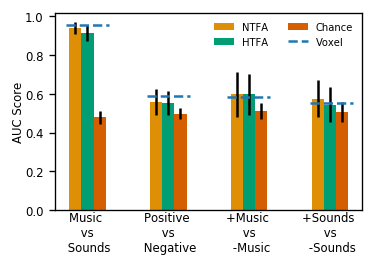

In [44]:
pl.rc('legend', frameon=False)
pl.rc('figure', figsize=( 1 * column_width, 
                          0.66 * column_width),
                dpi=120)
pl.rc('savefig', dpi=300)
pl.rc('font', size=7)

confidence = 0.95
voxel_mus_sounds_accuracies = np.mean(voxel_mus_sounds_summary_means)
voxel_mus_sounds_errs = stats.sem(voxel_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_sounds_summary_means) - 1)
htfa_mus_sounds_accuracies = np.mean(htfa_mus_sounds_summary_means)
htfa_mus_sounds_errs = stats.sem(htfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_sounds_summary_means) - 1)
ntfa_mus_sounds_accuracies = np.mean(ntfa_mus_sounds_summary_means)
ntfa_mus_sounds_errs = stats.sem(ntfa_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_sounds_summary_means) - 1)
dummy_mus_sounds_accuracies = np.mean(dummy_mus_sounds_summary_means)
dummy_mus_sounds_errs = stats.sem(dummy_mus_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_sounds_summary_means) - 1)

voxel_pos_neg_accuracies = np.mean(voxel_pos_neg_summary_means)
voxel_pos_neg_errs = stats.sem(voxel_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_pos_neg_summary_means) - 1)
htfa_pos_neg_accuracies = np.mean(htfa_pos_neg_summary_means)
htfa_pos_neg_errs = stats.sem(htfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_pos_neg_summary_means) - 1)
ntfa_pos_neg_accuracies = np.mean(ntfa_pos_neg_summary_means)
ntfa_pos_neg_errs = stats.sem(ntfa_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_pos_neg_summary_means) - 1)
dummy_pos_neg_accuracies = np.mean(dummy_pos_neg_summary_means)
dummy_pos_neg_errs = stats.sem(dummy_pos_neg_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                          len(dummy_pos_neg_summary_means) - 1)
voxel_mus_accuracies = np.mean(voxel_mus_summary_means)
voxel_mus_errs = stats.sem(voxel_mus_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_mus_summary_means) - 1)
htfa_mus_accuracies = np.mean(htfa_mus_summary_means)
htfa_mus_errs = stats.sem(htfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_mus_summary_means) - 1)
ntfa_mus_accuracies = np.mean(ntfa_mus_summary_means)
ntfa_mus_errs = stats.sem(ntfa_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_mus_summary_means) - 1)
dummy_mus_accuracies = np.mean(dummy_mus_summary_means)
dummy_mus_errs = stats.sem(dummy_mus_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_mus_summary_means) - 1)

voxel_sounds_accuracies = np.mean(voxel_sounds_summary_means)
voxel_sounds_errs = stats.sem(voxel_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2, 
                                                                     len(voxel_sounds_summary_means) - 1)
htfa_sounds_accuracies = np.mean(htfa_sounds_summary_means)
htfa_sounds_errs = stats.sem(htfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(htfa_sounds_summary_means) - 1)
ntfa_sounds_accuracies = np.mean(ntfa_sounds_summary_means)
ntfa_sounds_errs = stats.sem(ntfa_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(ntfa_sounds_summary_means) - 1)
dummy_sounds_accuracies = np.mean(dummy_sounds_summary_means)
dummy_sounds_errs = stats.sem(dummy_sounds_summary_means) * stats.t.ppf((1 + confidence) / 2,
                                                                        len(dummy_sounds_summary_means) - 1)

datasets = ['Music \n vs \n Sounds','Positive \n vs \n Negative',
            '+Music \n vs \n -Music','+Sounds \n vs \n -Sounds'] 

# datasets = ['Music v Sound','Positive v Negative',
#             '+Music v -Music','+Sounds v -Sounds'] 

voxel_accuracies = [voxel_mus_sounds_accuracies,voxel_pos_neg_accuracies,
                    voxel_mus_accuracies,voxel_sounds_accuracies]
voxel_errs = [voxel_mus_sounds_errs, voxel_pos_neg_errs, 
              voxel_mus_errs, voxel_sounds_errs]
htfa_accuracies = [htfa_mus_sounds_accuracies,htfa_pos_neg_accuracies,
                    htfa_mus_accuracies,htfa_sounds_accuracies]
htfa_errs = [htfa_mus_sounds_errs, htfa_pos_neg_errs, 
              htfa_mus_errs, htfa_sounds_errs]
ntfa_accuracies = [ntfa_mus_sounds_accuracies,ntfa_pos_neg_accuracies,
                    ntfa_mus_accuracies,ntfa_sounds_accuracies]
ntfa_errs = [ntfa_mus_sounds_errs, ntfa_pos_neg_errs, 
             ntfa_mus_errs, ntfa_sounds_errs]
dummy_accuracies = [dummy_mus_sounds_accuracies,dummy_pos_neg_accuracies,
                    dummy_mus_accuracies,dummy_sounds_accuracies] 
dummy_errs = [dummy_mus_sounds_errs, dummy_pos_neg_errs, 
             dummy_mus_errs, dummy_sounds_errs]
xs = np.arange(len(datasets))

colorblind_cycler = cycler(color=color_palette('colorblind'))
colorblind_colors = [c['color'] for c in colorblind_cycler]
muted_cycler = cycler(color=color_palette('bright'))
muted_colors = [c['color'] for c in muted_cycler]

bar_width = 0.15
fig = pl.figure()
ax = fig.add_subplot(111)
# voxel_bar = pl.bar(xs, height=voxel_accuracies, color=colorblind_colors[0], width=bar_width, yerr=voxel_errs)
ntfa_bar = pl.bar(xs + 0*bar_width, height=ntfa_accuracies, color=colorblind_colors[1], 
                  width=bar_width, yerr=ntfa_errs,label='NTFA')
htfa_bar = pl.bar(xs + 1*bar_width, height=htfa_accuracies, color=colorblind_colors[2], 
                  width=bar_width, yerr=htfa_errs,label='HTFA')
dummy_bar = pl.bar(xs + 2*bar_width, height=dummy_accuracies, color=colorblind_colors[3], 
                   width=bar_width, yerr=dummy_errs,label='Chance')
ax.axhline(voxel_accuracies[0],xmin=0.035,xmax=0.175,linestyle='dashed',label='Voxel')
ax.axhline(voxel_accuracies[1],xmin=0.30,xmax=0.44,linestyle='dashed')
ax.axhline(voxel_accuracies[2],xmin=0.56,xmax=0.70,linestyle='dashed')
ax.axhline(voxel_accuracies[3],xmin=0.83,xmax=0.97,linestyle='dashed')
handles, labels = ax.get_legend_handles_labels()
# labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
new_labels = ['NTFA','HTFA','Chance','Voxel']
new_handles = [handles[1],handles[2],handles[3],handles[0]]
# ax.set_xticks(xs+bar_width)
# pl.xticks(xs+0*bar_width, datasets)
# pl.xticks([0,1+bar_width,2+bar_width,3+bar_width], datasets)
ax.set_xticks(xs+1*bar_width)
ax.tick_params(axis='x',bottom=False,pad=-3)
ax.set_xticklabels(datasets)
pl.legend(new_handles, new_labels,ncol=2, prop={'size': 6})

pl.ylabel('AUC Score',labelpad=0)
pl.ylim(bottom=0,)
fig.savefig('lepping_svm_accuracies_ci.pdf')

In [45]:
from scipy.stats import pearsonr
from scipy.special import betainc
def corrcoef(matrix):
    r = np.corrcoef(matrix)
    rf = r[np.triu_indices(r.shape[0], 1)]
    df = matrix.shape[1] - 2
    ts = rf * rf * (df / (1 - rf * rf))
    pf = betainc(0.5 * df, 0.5, df / (df + ts))
    p = np.zeros(shape=r.shape)
    p[np.triu_indices(p.shape[0], 1)] = pf
    p[np.tril_indices(p.shape[0], -1)] = p.T[np.tril_indices(p.shape[0], -1)]
    p[np.diag_indices(p.shape[0])] = np.ones(p.shape[0])
    return r, p


In [46]:
### functional connectivity using NTFA ###

all_factor_centers = dtfa_hyperparams['factor_centers']['mu'].data.numpy()
all_factor_widths = np.exp(dtfa_hyperparams['factor_log_widths']['mu'].data.numpy())

negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(dtfa.num_blocks):
    r,p = corrcoef(all_weights_dtfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(dtfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(dtfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_dtfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix  * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [47]:
### task classification using 3Fold CV on NTFA all tasks with FC###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append((all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.3333 +- 0.2569
Processing negative_sounds
Scores: 0.4583 +- 0.2125
Chance Scores: 0.5000 +- 0.2041
Processing positive_music
Scores: 0.4583 +- 0.1559
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.4167 +- 0.2619
Overall Dummy Score: 0.4896 +- 0.2192


Processing Subject control02
Processing negative_music
Scores: 0.5417 +- 0.4125
Chance Scores: 0.3750 +- 0.2041
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.5417 +- 0.4125
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7188 +- 0.3577
Overall Dummy Score: 0.4583 +- 0.2062


Processing Subject control03
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.2125
Processing

Scores: 1.0000 +- 0.0000
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.7708 +- 0.2968
Overall Dummy Score: 0.4375 +- 0.2073


Processing Subject mdd02
Processing negative_music
Scores: 0.7083 +- 0.3281
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.3333 +- 0.1559
Processing positive_music
Scores: 0.3750 +- 0.2700
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.2700
...
Overall Score: 0.6667 +- 0.3474
Overall Dummy Score: 0.5625 +- 0.2627


Processing Subject mdd03
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5694 +- 0.2265
Processing negative_sounds
Scores: 0.3889 +- 0.4374
Chance Scores: 0.2778

In [48]:
### task classification using 3Fold CV on NTFA all tasks with FC with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
#             if i not in validation_blocks:
            block = dtfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())
        summary_subject_chance_means.append(np.array(overall_result_chance).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("NTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("NTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.4f +- %1.4f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("NTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

print("Overall Dummy Mean/SE Score: %1.4f +- %1.4f" % (
np.array(summary_subject_chance_means).mean(),
stats.sem(summary_subject_chance_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_chance_means) - 1)))

ntfa_summary_result = summary_result
dummy_summary_result = summary_result_chance
ntfa_summary_means = summary_subject_means
dummy_summary_means = summary_subject_chance_means

Processing Subject control01
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.2569
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.2357
...
Overall Score: 0.5833 +- 0.2357
Overall Dummy Score: 0.5312 +- 0.2400


Processing Subject control02
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    6 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4939 4941 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7083 +- 0.4125
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.2500 +- 0.1021
...
Overall Score: 0.5938 +- 0.3466
Overall Dummy Score: 0.3542 +- 0.1122


Processing Subject control03
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    6 ... 4939 4941 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   17 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5   14 ... 4941 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   17   22 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.2917 +- 0.1179
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5833 +- 0.3436
Overall Dummy Score: 0.5208 +- 0.2329


Processing Subject control04
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   12   17 ... 4941 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   16 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4941 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   17   22 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.5417 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5729 +- 0.2816
Overall Dummy Score: 0.4583 +- 0.1284


Processing Subject control05
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4936 4938 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    8 ... 4945 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    8 ... 4941 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4939 4941 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.2357
Chance Scores: 0.8333 +- 0.0589
Processing negative_sounds
Scores: 0.5417 +- 0.0589
Chance Scores: 0.5833 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   11   17 ... 4941 4943 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    6    8 ... 4940 4941 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4941 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   17   22 ... 4941 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.2357
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4896 +- 0.2996
Overall Dummy Score: 0.5312 +- 0.2289


Processing Subject control06
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.7083 +- 0.2569
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7083 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7    9 ... 4939 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    7 ... 4939 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7   10 ... 4937 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.2917 +- 0.1559
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5104 +- 0.2907
Overall Dummy Score: 0.6354 +- 0.2192


Processing Subject control07
Processing negative_music
Scores: 0.5000 +- 0.0000
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2569
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    7    9 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    7    9 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    7    9 ... 4939 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.4583 +- 0.4125
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4688 +- 0.2981
Overall Dummy Score: 0.5104 +- 0.2132


Processing Subject control08
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4   13 ... 4941 4943 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   13   39 ... 4942 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    7   10 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4722 +- 0.3356
Chance Scores: 0.3194 +- 0.0520
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4861 +- 0.1874
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.4583 +- 0.2569
...
Overall Score: 0.5972 +- 0.2565
Overall Dummy Score: 0.4306 +- 0.1762


Processing Subject control09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   13   14 ... 4941 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    6   12 ... 4938 4939 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4   13 ... 4938 4939 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   13   14 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.5833 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.7083 +- 0.4125
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.5938 +- 0.3577
Overall Dummy Score: 0.5625 +- 0.2195


Processing Subject control10
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   14 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   15 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.3750 +- 0.4449
Processing negative_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5521 +- 0.2907
Overall Dummy Score: 0.4688 +- 0.2801


Processing Subject control11
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    8 ... 4943 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    8 ... 4941 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4941 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7   10 ... 4940 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.4714
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5833 +- 0.2569
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   11 ... 4942 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    8 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    7   11 ... 4937 4940 4941] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   10 ... 4941 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2917 +- 0.0589
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.6146 +- 0.3661
Overall Dummy Score: 0.6250 +- 0.2394


Processing Subject control12
Processing negative_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3   12 ... 4925 4927 4938] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   13 ... 4929 4936 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    8   13 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6    9 ... 4927 4936 4937] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.4125
Chance Scores: 0.3333 +- 0.2125
Processing positive_sounds
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5833 +- 0.3281
...
Overall Score: 0.4688 +- 0.3823
Overall Dummy Score: 0.4792 +- 0.2491


Processing Subject control13
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.7500 +- 0.1768
Processing negative_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5417 +- 0.2569
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   14   17 ... 4936 4937 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   14 ... 4922 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    9 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   9   12   14 ... 4926 4934 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.4583 +- 0.2569
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5208 +- 0.3012
Overall Dummy Score: 0.5521 +- 0.2251


Processing Subject control14
Processing negative_music
Scores: 0.5417 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.7917 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4934 4936 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4936 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4942 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4935 4936 4940] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.5417 +- 0.2569
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6250 +- 0.3680
...
Overall Score: 0.4271 +- 0.3325
Overall Dummy Score: 0.6354 +- 0.2770


Processing Subject control15
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4939 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4939 4940 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4934 4939 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4939 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.2357
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.5729 +- 0.2625
Overall Dummy Score: 0.5312 +- 0.2112


Processing Subject control16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    4    5 ... 4940 4942 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4937 4939 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   10   25 ... 4934 4935 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8   14 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.4167 +- 0.1559
Processing positive_sounds
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6146 +- 0.2816
Overall Dummy Score: 0.4062 +- 0.1036


Processing Subject control17
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1   15 ... 4935 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4942 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   10 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   16 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.6250 +- 0.3680
Chance Scores: 0.7500 +- 0.1768
Processing positive_music
Scores: 0.6250 +- 0.3062
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.6250 +- 0.3715
Overall Dummy Score: 0.5938 +- 0.1918


Processing Subject control18
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   10 ... 4942 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    6 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   16 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4937 4939 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.4583 +- 0.2569
Chance Scores: 0.8750 +- 0.1021
Processing positive_music
Scores: 0.7083 +- 0.0589
Chance Scores: 0.7917 +- 0.0589
Processing positive_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.5833 +- 0.3076
Overall Dummy Score: 0.6562 +- 0.2400


Processing Subject control19
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4937 4939 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    6 ... 4936 4937 4939] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4938 4939 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4939 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7917 +- 0.2946
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.4583 +- 0.2569
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.7396 +- 0.3039
Overall Dummy Score: 0.5104 +- 0.1872


Processing Subject control20
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    7 ... 4942 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    8    9 ... 4942 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4937 4938 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   18   20 ... 4940 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.1768
Processing negative_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.4583 +- 0.2569
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.4792 +- 0.2643
Overall Dummy Score: 0.5625 +- 0.1943


Processing Subject mdd01
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4937 4938 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    7 ... 4939 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    9   15 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    7 ... 4938 4939 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.4714
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4583 +- 0.3118
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5938 +- 0.3789
Overall Dummy Score: 0.4271 +- 0.2472


Processing Subject mdd02
Processing negative_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4939 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4940 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.7500 +- 0.1768
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.5000 +- 0.3385
Overall Dummy Score: 0.5521 +- 0.2006


Processing Subject mdd03
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.4444 +- 0.2187
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7   12 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    9 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4937 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7   12 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5556 +- 0.4157
Chance Scores: 0.5278 +- 0.2079
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5694 +- 0.3049
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.6667 +- 0.3118
...
Overall Score: 0.3889 +- 0.4087
Overall Dummy Score: 0.5521 +- 0.2770


Processing Subject mdd04
Processing negative_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.1250 +- 0.1021
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.5000 +- 0.3062
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.2917 +- 0.1559
...
Overall Score: 0.5417 +- 0.3620
Overall Dummy Score: 0.5417 +- 0.2990


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4940 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    6 ... 4942 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    7 ... 4940 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.2357
Chance Scores: 0.4583 +- 0.1559
Processing positive_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.5417 +- 0.3118
Processing positive_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.4271 +- 0.3165
Overall Dummy Score: 0.4688 +- 0.1918


Processing Subject mdd07
Processing negative_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4941 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   15 ... 4945 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    7    9 ... 4940 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    5 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.3536
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.6458 +- 0.2924
Overall Dummy Score: 0.4688 +- 0.2558


Processing Subject mdd08
Processing negative_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.2917 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   11 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2   10 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.4583 +- 0.2569
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5000 +- 0.1768
Processing positive_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.2500 +- 0.1021
...
Overall Score: 0.5938 +- 0.2847
Overall Dummy Score: 0.3750 +- 0.2104


Processing Subject mdd09
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    7 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    8 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    8 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3584
Chance Scores: 0.8333 +- 0.1559
Processing positive_music
Scores: 0.7083 +- 0.4125
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.2125
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.5938 +- 0.2345


Processing Subject mdd10
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   10 ... 4944 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4943 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   10 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.4125
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.6250 +- 0.2700
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6146 +- 0.3696
Overall Dummy Score: 0.5521 +- 0.2472


Processing Subject mdd11
Processing negative_music
Scores: 0.1667 +- 0.1179
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   16   17 ... 4929 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   11   26 ... 4927 4929 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   10   11 ... 4927 4929 4934] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  10   11   24 ... 4927 4929 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.4792 +- 0.3301
Overall Dummy Score: 0.5417 +- 0.1863


Processing Subject mdd12
Processing negative_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.7917 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6   11   26 ... 4929 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    9   11 ... 4929 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4940 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4943 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3584
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.4271 +- 0.2996
Overall Dummy Score: 0.5833 +- 0.2412


Processing Subject mdd13
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4939 4940 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4940 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4943 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    6 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.2917 +- 0.3281
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5312 +- 0.3312
Overall Dummy Score: 0.5104 +- 0.2364


Processing Subject mdd14
Processing negative_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    6 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4941 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.7083 +- 0.2125
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.6562 +- 0.2892
Overall Dummy Score: 0.5625 +- 0.2627


Processing Subject mdd15
Processing negative_music
Scores: 0.7917 +- 0.2946
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  21   22   26 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  22   24   29 ... 4939 4940 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    6   12 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   13   17 ... 4943 4944 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.1667 +- 0.2357
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.4375 +- 0.3733
Overall Dummy Score: 0.4688 +- 0.2112


Processing Subject mdd16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   10   11 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   17 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    8 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    8   11 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.7500 +- 0.2041
Processing positive_music
Scores: 0.2083 +- 0.2946
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    8   10 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   17 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    8 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   23 ... 4939 4940 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.4125
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.4375 +- 0.3590
Overall Dummy Score: 0.5000 +- 0.2339


Processing Subject mdd17
Processing negative_music
Scores: 0.3750 +- 0.1768
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    8 ... 4939 4940 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    6   10 ... 4940 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   14   23 ... 4942 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   15 ... 4939 4940 4942] are constant.
  UserWarning)


Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3   10 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   14 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   16   19 ... 4942 4943 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7   10 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.6042 +- 0.3180
Overall Dummy Score: 0.4479 +- 0.1940


Processing Subject mdd18
Processing negative_music
Scores: 0.2500 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3750 +- 0.2700
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    8   12 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  16   19   25 ... 4941 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   16   19 ... 4943 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    7 ... 4942 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.4449
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5000 +- 0.3062
...
Overall Score: 0.5312 +- 0.4334
Overall Dummy Score: 0.5000 +- 0.2932


Processing Subject mdd19
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.2917 +- 0.1559
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.0589
...
Overall Score: 0.5417 +- 0.3511
Overall Dummy Score: 0.4896 +- 0.2418


...
NTFA Summary Score Across Subjects, For Category negative_music : 0.5256 +- 0.3506
NTFA Summary Score Across Subjects, For Category positive_music : 0.5493 +- 0.3293
NTFA Summary Score Across Subjects, For Category positive_sounds : 0.5340 +- 0.3478
NTFA Summary Score Across Subjects, For Category negative_sounds : 0.5727 +- 0.3177
...
NTFA S

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   10 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    6 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2   10 ... 4941 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

In [49]:
### functional connectivity using HTFA ###
negative_music_matrix = []
positive_music_matrix = []
negative_sounds_matrix = []
positive_sounds_matrix = []

all_matrix = []

negative_music_matrix_p = []
positive_music_matrix_p = []
negative_sounds_matrix_p = []
positive_sounds_matrix_p = []
all_matrix_p = []

for i in range(htfa.num_blocks):
    r,p = corrcoef(all_weights_htfa[i,:,:].T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
    if block_task_labeler(htfa._blocks[i]) == 'negative_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_music_matrix.append(r)
        negative_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_music':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_music_matrix.append(r)
        positive_music_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'negative_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        negative_sounds_matrix.append(r)
        negative_sounds_matrix_p.append(p)
    elif  block_task_labeler(htfa._blocks[i]) == 'positive_sounds':
        r,p = corrcoef(all_weights_htfa[i,:,:].T)
        p = p < 0.05
        positive_sounds_matrix.append(r)
        positive_sounds_matrix_p.append(p)
    else:
        print ('Something is WRONG!!!')

        
negative_music_matrix = np.array(negative_music_matrix)
positive_music_matrix = np.array(positive_music_matrix)
negative_sounds_matrix = np.array(negative_sounds_matrix)
positive_sounds_matrix = np.array(positive_sounds_matrix)

all_matrix = np.array(all_matrix)
        
negative_music_matrix_p = np.array(negative_music_matrix_p)
positive_music_matrix_p = np.array(positive_music_matrix_p)
negative_sounds_matrix_p = np.array(negative_sounds_matrix_p)
positive_sounds_matrix_p = np.array(positive_sounds_matrix_p)
all_matrix_p = np.array(all_matrix_p)

negative_music_matrix = negative_music_matrix * negative_music_matrix_p
positive_music_matrix = positive_music_matrix * positive_music_matrix_p
negative_sounds_matrix = negative_sounds_matrix * negative_sounds_matrix_p
positive_sounds_matrix = positive_sounds_matrix * positive_sounds_matrix_p

all_matrix = all_matrix * all_matrix_p


all_vectors = np.zeros(shape=(all_matrix.shape[0],4950))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],4950))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

negative_music_vectors = np.zeros(shape=(negative_music_matrix.shape[0],4950))
negative_music_vectors_p = np.zeros(shape=(negative_music_matrix_p.shape[0],4950))

for i in range(negative_music_matrix.shape[0]):
    negative_music_vectors[i,:] = distance.squareform(negative_music_matrix[i,:,:],checks=False)
    negative_music_vectors_p[i,:] = distance.squareform(negative_music_matrix_p[i,:,:],checks=False)

positive_music_vectors = np.zeros(shape=(positive_music_matrix.shape[0],4950))
positive_music_vectors_p = np.zeros(shape=(positive_music_matrix_p.shape[0],4950))

for i in range(positive_music_matrix.shape[0]):
    positive_music_vectors[i,:] = distance.squareform(positive_music_matrix[i,:,:],checks=False)
    positive_music_vectors_p[i,:] = distance.squareform(positive_music_matrix_p[i,:,:],checks=False)

    
negative_sounds_vectors = np.zeros(shape=(negative_sounds_matrix.shape[0],4950))
negative_sounds_vectors_p = np.zeros(shape=(negative_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    negative_sounds_vectors[i,:] = distance.squareform(negative_sounds_matrix[i,:,:],checks=False)
    negative_sounds_vectors_p[i,:] = distance.squareform(negative_sounds_matrix_p[i,:,:],checks=False)
    
positive_sounds_vectors = np.zeros(shape=(positive_sounds_matrix.shape[0],4950))
positive_sounds_vectors_p = np.zeros(shape=(positive_sounds_matrix_p.shape[0],4950))

for i in range(negative_sounds_matrix.shape[0]):
    positive_sounds_vectors[i,:] = distance.squareform(positive_sounds_matrix[i,:,:],checks=False)
    positive_sounds_vectors_p[i,:] = distance.squareform(positive_sounds_matrix_p[i,:,:],checks=False)

    
negative_music_vectors_mean = negative_music_vectors.mean(0)
negative_music_vectors_std = negative_music_vectors.std(0)
positive_music_vectors_mean = positive_music_vectors.mean(0)
positive_music_vectors_std = positive_music_vectors.std(0)
negative_sounds_vectors_mean = negative_sounds_vectors.mean(0)
negative_sounds_vectors_std = negative_sounds_vectors.std(0)
positive_sounds_vectors_mean = positive_sounds_vectors.mean(0)
positive_sounds_vectors_std = positive_sounds_vectors.std(0)

In [50]:
### task classification using 3Fold CV on HTFA all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.7500 +- 0.0000
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 1.0000 +- 0.0000
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.6458 +- 0.3602
Overall Dummy Score: 0.5000 +- 0.1768


Processing Subject control02
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.7083 +- 0.1559
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.4167 +- 0.2764
Overall Dummy Score: 0.5521 +- 0.1872


Processing Subject control03
Processing negative_music
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5417 +- 0.3281
Processing

Scores: 0.5417 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.3062
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.5000 +- 0.2041
...
Overall Score: 0.4583 +- 0.2619
Overall Dummy Score: 0.4375 +- 0.1301


Processing Subject mdd01
Processing negative_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.2083 +- 0.1559
Processing positive_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5000 +- 0.0000
...
Overall Score: 0.8646 +- 0.1727
Overall Dummy Score: 0.4167 +- 0.1718


Processing Subject mdd02
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5000

In [51]:
### task classification using 3Fold CV on HTFA all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
subjects = OrderedSet([b.subject for b in htfa._blocks])
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(htfa.num_blocks):
#             if i not in validation_blocks:
            block = htfa._blocks[i]
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(block_task_labeler(block))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                       session_labels=None, cv=cv,
                                                                       scoring="roc_auc",feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)
        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("HTFA Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("HTFA Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("HTFA Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

htfa_summary_result = summary_result
htfa_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.5000 +- 0.4082
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.3062
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5833 +- 0.4249
Chance Scores: 0.3750 +- 0.1768
...
Overall Score: 0.6667 +- 0.3436
Overall Dummy Score: 0.5625 +- 0.2676


Processing Subject control02
Processing negative_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3   11 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.5417 +- 0.2357
Processing positive_music
Scores: 0.7083 +- 0.4125
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds
Scores: 0.2917 +- 0.1559
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5208 +- 0.3566
Overall Dummy Score: 0.4479 +- 0.1872


Processing Subject control03
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   11   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   11 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   11   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.3281
Chance Scores: 0.4167 +- 0.2125
Processing positive_music
Scores: 0.4583 +- 0.4125
Chance Scores: 0.6667 +- 0.2125
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.5417 +- 0.3281
...
Overall Score: 0.5208 +- 0.3779
Overall Dummy Score: 0.5521 +- 0.2472


Processing Subject control04
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4943 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    6    8 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4943 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5    7 ... 4942 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7    8   10 ... 4940 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   7   10   11 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7    9 ... 4939 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3864
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.7188 +- 0.3540
Overall Dummy Score: 0.5833 +- 0.2301


Processing Subject control05
Processing negative_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.7083 +- 0.2357
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
Processing positive_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2   14 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4942 4943 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.3854 +- 0.3123
Overall Dummy Score: 0.4688 +- 0.2112


Processing Subject control06
Processing negative_music
Scores: 0.5833 +- 0.2357
Chance Scores: 0.6667 +- 0.2357
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.2917 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.7083 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4   11 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   11   15 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   11 ... 4943 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  11   19   24 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2917 +- 0.1559
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.5938 +- 0.3312
Overall Dummy Score: 0.5208 +- 0.2740


Processing Subject control07
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.3750 +- 0.2700
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    6    9 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   11   19 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8   20 ... 4942 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   35   53 ... 4939 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.4125
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5000 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.4896 +- 0.4033
Overall Dummy Score: 0.4583 +- 0.2125


Processing Subject control08
Processing negative_music
Scores: 0.7778 +- 0.3143
Chance Scores: 0.4861 +- 0.2771
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   20   32 ... 4938 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    8   19 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   20   32 ... 4939 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   30 ... 4938 4941 4942] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.5278 +- 0.3356
Chance Scores: 0.6111 +- 0.3068
Processing positive_sounds
Scores: 0.8611 +- 0.1039
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.7292 +- 0.2849
Overall Dummy Score: 0.5347 +- 0.2429


Processing Subject control09
Processing negative_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   11   12 ... 4936 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    8 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   10   12 ... 4943 4944 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   12   14 ... 4940 4941 4943] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2917 +- 0.0589
Chance Scores: 0.2917 +- 0.1179
Processing positive_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5312 +- 0.3390
Overall Dummy Score: 0.4062 +- 0.1155


Processing Subject control10
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    6   10 ... 4922 4927 4930] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    9   15 ... 4930 4935 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   14 ... 4941 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   10   12 ... 4930 4934 4935] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.1179
Processing positive_music
Scores: 0.6042 +- 0.2062
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.6250 +- 0.2041
...
Overall Score: 0.6094 +- 0.3249
Overall Dummy Score: 0.4896 +- 0.2132


Processing Subject control11
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5417 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   10   17 ... 4943 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   17 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    6 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   10   16 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5417 +- 0.3931
Overall Dummy Score: 0.4583 +- 0.0932


Processing Subject control12
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4941 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4944 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.4125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.6250 +- 0.1768
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4167 +- 0.1179
...
Overall Score: 0.5625 +- 0.3733
Overall Dummy Score: 0.4583 +- 0.1559


Processing Subject control13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4940 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    5 ... 4944 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4936 4938 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    7 ... 4936 4938 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.8750 +- 0.1021
Processing negative_sounds
Scores: 0.5000 +- 0.0000
Chance Scores: 0.8333 +- 0.1559
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.7083 +- 0.2569
Processing positive_sounds
Scores: 0.4583 +- 0.3281
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5521 +- 0.3206
Overall Dummy Score: 0.7604 +- 0.2308


Processing Subject control14
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2569
Chance Scores: 0.4167 +- 0.1559
Processing negative_sounds
Scores: 0.2917 +- 0.2125
Chance Scores: 0.5833 +- 0.2946
Processing positive_music
Scores: 0.6250 +- 0.3680
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.3750 +- 0.3680
Chance Scores: 0.3333 +- 0.2125
...
Overall Score: 0.5000 +- 0.3536
Overall Dummy Score: 0.4792 +- 0.2491


Processing Subject control15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2   15 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   17   18 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.3281
Chance Scores: 0.7500 +- 0.1768
Processing negative_sounds
Scores: 0.6667 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.4583 +- 0.1559
Chance Scores: 0.4167 +- 0.2357
...
Overall Score: 0.5938 +- 0.3390
Overall Dummy Score: 0.5312 +- 0.2400


Processing Subject control16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    8   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   12 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   44 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.3680
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.5417 +- 0.3584
Chance Scores: 0.2500 +- 0.1021
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds
Scores: 0.3750 +- 0.4449
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.6250 +- 0.4018
Overall Dummy Score: 0.4896 +- 0.2132


Processing Subject control17
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   12 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   10 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2083 +- 0.2946
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5833 +- 0.1559
Processing positive_music
Scores: 0.4583 +- 0.2125
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5    7   10 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    6 ... 4943 4946 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   15   18 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    7    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6250 +- 0.3680
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4271 +- 0.3206
Overall Dummy Score: 0.4792 +- 0.1233


Processing Subject control18
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.6250 +- 0.4449
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1   10 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    6 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    5   10 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.6354 +- 0.3516
Overall Dummy Score: 0.4375 +- 0.1197


Processing Subject control19
Processing negative_music
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5417 +- 0.3584
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5000 +- 0.3536
Chance Scores: 0.6250 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4943 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   10   15 ... 4942 4945 4946] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.5000 +- 0.2700
Overall Dummy Score: 0.5417 +- 0.2301


Processing Subject control20
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4944 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5417 +- 0.2125
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.4688 +- 0.3390
Overall Dummy Score: 0.4896 +- 0.1297


Processing Subject mdd01
Processing negative_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.7083 +- 0.1559
Processing negative_sounds
Scores: 0.3750 +- 0.1768
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5833 +- 0.3118
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    9 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    9   11 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    7    8 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    6 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.6458 +- 0.3417
Overall Dummy Score: 0.5625 +- 0.2195


Processing Subject mdd02
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   14 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    4 ... 4941 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4941 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4   15 ... 4941 4942 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5625 +- 0.3404
Overall Dummy Score: 0.4375 +- 0.1573


Processing Subject mdd03
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.3056 +- 0.2750
Chance Scores: 0.3611 +- 0.1874
Processing positive_music
Scores: 0.2778 +- 0.2079
Chance Scores: 0.5833 +- 0.2357
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    5    8 ... 4942 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    4    5 ... 4934 4938 4940] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4933 4934 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   16 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.4583 +- 0.1179
...
Overall Score: 0.3542 +- 0.3212
Overall Dummy Score: 0.4965 +- 0.2148


Processing Subject mdd04
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.7917 +- 0.2125
Processing negative_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.2946
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   15 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   22 ... 4945 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1   10   18 ... 4944 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4940 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.4125
Chance Scores: 0.5417 +- 0.2357
...
Overall Score: 0.6771 +- 0.3552
Overall Dummy Score: 0.5833 +- 0.2619


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.3333 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4941 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    5 ... 4944 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    4 ... 4940 4942 4945] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    5 ... 4940 4945 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
...
Overall Score: 0.3542 +- 0.2787
Overall Dummy Score: 0.5312 +- 0.1985


Processing Subject mdd07
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.5000 +- 0.1768
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7083 +- 0.3281
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4941 4943 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4941 4944 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    4 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.3333 +- 0.2357
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.4062 +- 0.2754
Overall Dummy Score: 0.5521 +- 0.2251


Processing Subject mdd08
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5833 +- 0.1179
Processing negative_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5417 +- 0.3281
Processing positive_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   12   15 ... 4939 4941 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4   11   15 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2   15   18 ... 4922 4930 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    5 ... 4939 4941 4947] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.1768
...
Overall Score: 0.4479 +- 0.3039
Overall Dummy Score: 0.5938 +- 0.2232


Processing Subject mdd09
Processing negative_music
Scores: 0.5000 +- 0.2041
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
Scores: 0.2500 +- 0.0000
Chance Scores: 0.4583 +- 0.3864
Processing positive_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4   10 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    5   10 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    6    9 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0   10   11 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.3536
Chance Scores: 0.3750 +- 0.3062
...
Overall Score: 0.5625 +- 0.3404
Overall Dummy Score: 0.4896 +- 0.3123


Processing Subject mdd10
Processing negative_music
Scores: 0.7500 +- 0.3536
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.2917 +- 0.1179
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   4    6   10 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    9   10 ... 4942 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    6 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.2917 +- 0.4125
Chance Scores: 0.6667 +- 0.2357
...
Overall Score: 0.5729 +- 0.4033
Overall Dummy Score: 0.4688 +- 0.2173


Processing Subject mdd11
Processing negative_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.2500 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.2917 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    5   10 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   16   21 ... 4940 4941 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   5   16   26   37   40   49   52   57   67   77   87  104  106  107
  114  117  120  122  128  129  132  136  146  149  151  152  153  154
  156  159  160  162  168  169  173  174  175  177  178  179  182  185
  192  193  196  209  214  215  219  220  225  233  237  246  247  251
  253  256  258  259  262  265  266  267  269  270  271  277  279  283
  289  295  296  299  300  302  309  312  319  320  321  324  325  326


Scores: 0.4583 +- 0.3281
Chance Scores: 0.7083 +- 0.1559
...
Overall Score: 0.4792 +- 0.3180
Overall Dummy Score: 0.4167 +- 0.2062


Processing Subject mdd12
Processing negative_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.3750 +- 0.1021
Chance Scores: 0.6250 +- 0.2041
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.5521 +- 0.2952
Overall Dummy Score: 0.5000 +- 0.1693


Processing Subject mdd13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   8   11   16 ... 4946 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    3    8 ... 4944 4945 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   6    8   15 ... 4940 4942 4944] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4942 4944 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.6667 +- 0.4714
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.4167 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.4583 +- 0.2125
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.4583 +- 0.3864
...
Overall Score: 0.5625 +- 0.3125
Overall Dummy Score: 0.5104 +- 0.2472


Processing Subject mdd14
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4944 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    5    9 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   16   26 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.4714
Chance Scores: 0.6667 +- 0.2357
Processing positive_sounds
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6146 +- 0.3661
Overall Dummy Score: 0.4896 +- 0.2006


Processing Subject mdd15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   16   26 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3   16   19 ... 4945 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    3 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.4583 +- 0.3281
Chance Scores: 0.5417 +- 0.2569
Processing negative_sounds
Scores: 0.2917 +- 0.0589
Chance Scores: 0.6250 +- 0.1021
Processing positive_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.7500 +- 0.2041
...
Overall Score: 0.4375 +- 0.3590
Overall Dummy Score: 0.5729 +- 0.2251


Processing Subject mdd16
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4941 4943 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4940 4945 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    3 ... 4943 4947 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds
Scores: 0.7083 +- 0.4125
Chance Scores: 0.5000 +- 0.2700
Processing positive_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4940 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4943 4944 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    3 ... 4942 4943 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4940 4942 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.0000
...
Overall Score: 0.6458 +- 0.3492
Overall Dummy Score: 0.4375 +- 0.1804


Processing Subject mdd17
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5833 +- 0.2946
Processing negative_sounds
Scores: 0.5417 +- 0.1559
Chance Scores: 0.5417 +- 0.3281
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   3    4    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    4 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.8333 +- 0.1179
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.6250 +- 0.2748
Overall Dummy Score: 0.5833 +- 0.2716


Processing Subject mdd18
Processing negative_music
Scores: 0.3333 +- 0.4714
Chance Scores: 0.5833 +- 0.2125
Processing negative_sounds
Scores: 0.7917 +- 0.2946
Chance Scores: 0.7500 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    3    4 ... 4943 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    4    5 ... 4947 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   2    3    4 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    2    4 ... 4945 4946 4948] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

Scores: 0.7083 +- 0.1559
Chance Scores: 0.3333 +- 0.1559
Processing positive_sounds
Scores: 0.5417 +- 0.3281
Chance Scores: 0.5833 +- 0.1179
...
Overall Score: 0.5938 +- 0.3754
Overall Dummy Score: 0.5625 +- 0.2135


Processing Subject mdd19
Processing negative_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.4583 +- 0.1559
Processing negative_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.4249
Chance Scores: 0.7500 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.4375 +- 0.3404
Overall Dummy Score: 0.5312 +- 0.1777


...
HTFA Summary Score Across Subjects, For Category negative_music : 0.5643 +- 0.3687
HTFA Summary Score Across Subjects, For Category positive_music : 0.5590 +- 0.3658
HTFA Summary Score Across Subjects, For Category positive_sounds : 0.5227 +- 0.3448
HTFA Summary Score Across Subjects, For Category negative_sounds : 0.5333 +- 0.3280
...
HTFA S

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   0    1    2 ... 4946 4947 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    7 ... 4942 4946 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   1    2    6 ... 4946 4948 4949] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features 

In [52]:
parcellation_file = '/home/zulqarnain/fmri_data/parcellation_masks/lepping_parcellation_180.nii.gz'

In [53]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

all_matrix = []
all_matrix_p = []
for i in range(dtfa.num_blocks):
    activations = dtfa.voxel_activations[i].data.numpy()
    locations = dtfa.voxel_locations.data.numpy()
    block_img = utils.cmu2nii(activations,locations,dtfa._templates[i])
    masker = NiftiLabelsMasker(labels_img=parcellation_file)
    time_series = masker.fit_transform(block_img)
    r,p = corrcoef(time_series.T)
    p = p < 0.05
    all_matrix.append(r)
    all_matrix_p.append(p)
all_matrix = np.array(all_matrix)
all_matrix_p = np.array(all_matrix_p)
all_matrix = all_matrix  * all_matrix_p
all_vectors = np.zeros(shape=(all_matrix.shape[0],16110))
all_vectors_p = np.zeros(shape=(all_matrix_p.shape[0],16110))

for i in range(all_matrix.shape[0]):
    all_vectors[i,:] = distance.squareform(all_matrix[i,:,:],checks=False)
    all_vectors_p[i,:] = distance.squareform(all_matrix_p[i,:,:],checks=False)

In [54]:
### task classification using 3Fold CV on input data all tasks###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(all_vectors[i])
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=False,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.0833 +- 0.1179
Chance Scores: 0.4583 +- 0.1179
Processing negative_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.4167 +- 0.3281
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.4167 +- 0.3830
Overall Dummy Score: 0.4167 +- 0.1863


Processing Subject control02
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.3750 +- 0.1768
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.6667 +- 0.1559
Processing positive_music
Scores: 0.5833 +- 0.1179
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6146 +- 0.3039
Overall Dummy Score: 0.4479 +- 0.1872


Processing Subject control03
Processing negative_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.6250 +- 0.2700
Processing

Scores: 0.5000 +- 0.2041
Chance Scores: 0.5833 +- 0.1179
Processing positive_music
Scores: 0.6667 +- 0.1179
Chance Scores: 0.3750 +- 0.2700
Processing positive_sounds
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5000 +- 0.2700
...
Overall Score: 0.6354 +- 0.2006
Overall Dummy Score: 0.5521 +- 0.2625


Processing Subject mdd01
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.3750 +- 0.1021
Chance Scores: 0.5833 +- 0.1559
Processing positive_music
Scores: 0.5417 +- 0.3584
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
...
Overall Score: 0.5938 +- 0.3067
Overall Dummy Score: 0.5000 +- 0.1443


Processing Subject mdd02
Processing negative_music
Scores: 0.3750 +- 0.1768
Chance Scores: 0.3750 +- 0.1768
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.3750 

In [55]:
### task classification using 3Fold CV on input data all tasks with feature selection###
cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
summary_result = []
summary_result_chance = []
summary_result_category = []
summary_subject_means = []
summary_subject_chance_means = []
feature_selection = SelectKBest(f_classif, k=500)

for s in dtfa.subjects():
    if s == 'mdd05':
        print ("Skipping Subject, not enough runs")
    else:
        print("Processing Subject %s" % (s))
        session_labels = []
        data = []
        targets = []
        for i in range(dtfa.num_blocks):
            block = dtfa._blocks[i]
#             if i not in validation_blocks:
            if block.subject == s:
                session_labels.append(block.run)
                data.append(np.arctanh(all_vectors[i]))
                targets.append(task_labeler(block.task))
        data = np.array(data)
        overall_result,overall_result_chance,category_result = classification_pipeline(data=data,
                                                                       targets=targets,
                                                                     session_labels=None,
                                                                        cv=cv,
                                                                       scoring="roc_auc",
                                                                       feature_select=True,
                                                                       feature_selection=feature_selection,
                                                                       print_all=True)

        summary_result_category.append(category_result)
        summary_result.extend(overall_result)
        summary_result_chance.extend(overall_result_chance)
        summary_subject_means.append(np.array(overall_result).mean())

print ('...')
category_result = {key:[] for key in ['negative_music','positive_music','positive_sounds','negative_sounds']}
for c in ['negative_music','positive_music','positive_sounds','negative_sounds']:
    for s in summary_result_category:
        if c in s.keys():
            category_result[c].extend(s[c])
    print("Voxel Summary Score Across Subjects, For Category %s : %1.4f +- %1.4f" % (c,
np.array(category_result[c]).mean(),
np.array(category_result[c]).std()))
    
print ('...')
print("Voxel Summary Score Across Subjects, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_result).mean(),
np.array(summary_result).std()))

print("Overall Dummy Score: %1.2f +- %1.2f" % (
np.array(summary_result_chance).mean(),
np.array(summary_result_chance).std()))

print ('...')
print("Voxel Summary Mean/SE, Across Tasks: %1.4f +- %1.4f" % (
np.array(summary_subject_means).mean(),
stats.sem(summary_subject_means) 
    * stats.t.ppf((1 + confidence) / 2, len(summary_subject_means) - 1)))

voxel_summary_result = summary_result
voxel_summary_means = summary_subject_means

Processing Subject control01
Processing negative_music
Scores: 0.2083 +- 0.0589
Chance Scores: 0.7500 +- 0.2041
Processing negative_sounds
Scores: 0.5417 +- 0.4125
Chance Scores: 0.2500 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    47    54 ... 16078 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    45 ... 16056 16059 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    32 ... 16017 16059 16091] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    31 ... 16093 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    13 ... 16091 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    29    32 ... 16091 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   34    37    38 ... 16056 16059 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    45 ... 16013 16017 16059] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.5208 +- 0.3261
Overall Dummy Score: 0.4688 +- 0.2608


Processing Subject control02
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.4583 +- 0.0589
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  618   619   621   645   777   793   794   795   796   809   810   811
   819   820   882  1402  1573  1743  1821  1989  1991  2076  2096  2100
  2129  2141  2144  2147  2157  2160  2162  2165  2166  2170  2177  2180
  2185  2198  2205  2217  2218  2219  2230  2246  2247  2489  2515  2639
  2644  2652  2653  2669  2742  2803  2807  2816  2978  3126  3132  3299
  3449  3616  4389  4968  4980  4993  5036  5710  5714  5853  5955  5995
  5999  6135  6140  6142  6238  6276  6280  6282  6378  6419  6421  6552
  6556  6557  6559  6655  6674  6953  6954  6957  6965  6967  6995  7017
  7053  7095  7099  7220  7228  7360  7495  7593  7607  7614  7621  7627
  7634  7723  7742  7750  7754  7784  7806  7842  7852  7853  7870  7878
  7882  7884  7891  7934  7970  7979  7980  7981  8005  8131  8143  8256
  8358  8364  8372  8380  8391  8393  8734  8746 

Scores: 0.5833 +- 0.3118
Chance Scores: 0.6667 +- 0.3118
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.6250 +- 0.2700
...
Overall Score: 0.5625 +- 0.3083
Overall Dummy Score: 0.5729 +- 0.2524


Processing Subject control03
Processing negative_music
Scores: 0.3333 +- 0.3118
Chance Scores: 0.4167 +- 0.2569
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   88   266   443   618   619   621   645   677   777   778   782   783
   793   794   795   796   804   807   809   810   811   820   852   877
   957   967  1140  1141  1236  1313  1402  1471  1475  1484  1573  1652
  1653  1743  1821  1823  1908  1989  1991  2096  2097  2124  2129  2146
  2147  2157  2158  2159  2162  2168  2170  2171  2174  2180  2184  2216
  2218  2219  2324  2489  2515  2639  2641  2644  2652  2653  2669  2675
  2711  2803  2807  2815  2816  2978  3126  3128  3132  3138  3139  3299
  3449  3457  3616  3760  3771  4238  4366  4389  4980  4984  4993  5579
  5706  5710  5712  5714  5845  5846  5849  5853  5866  5955  5995  5999
  6132  6135  6140  6142  6149  6238  6276  6280  6282  6289  6378  6419
  6421  6428  6549  6552  6553  6556  6557  6559  6566  6655  6839  6946
  6953  6954  6957  6961  6965  6967  6995  7053 

Scores: 0.3333 +- 0.3118
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.8333 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.7500 +- 0.3536
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.5625 +- 0.3698
Overall Dummy Score: 0.4583 +- 0.2062


Processing Subject control04
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   98   530   937   984  1057  1241  1254  1256  1317  1344  1348  1378
  1393  1399  1519  1564  1570  1910  2034  2078  2127  2132  2334  2335
  2336  2400  2501  2504  2512  2514  2523  2535  2576  2903  2988  3067
  3226  3309  3375  3860  4016  4239  4273  4426  4434  4471  4478  4619
  4704  4781  4783  4854  4862  4869  4876  4890  4920  4931  5003  5036
  5184  5228  5298  5331  5332  5346  5375  5444  5452  5521  5655  5666
  5705  5723  5803  5810  5848  5852  5952  5953  5955  6131  6236  6275
  6291  6320  6324  6331  6353  6375  6376  6414  6428  6430  6463  6470
  6514  6515  6601  6609  6652  6653  6703  6705  6738  6746  6789  6825
  6874  6882  6919  6926  6956  7017  7050  7054  7061  7080  7087  7090
  7105  7110  7112  7143  7184  7213  7317  7328  7330  7449  7460  7462
  7476  7483  7539  7580  7591  7593  7605  7608 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.5833 +- 0.2357
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    79    89 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    26    33 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   50    56    57 ... 16096 16102 16108] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    79    90 ... 16080 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.1021
Chance Scores: 0.5417 +- 0.3584
Processing positive_music
Scores: 0.4583 +- 0.1559
Chance Scores: 0.5000 +- 0.0000
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    33    50 ... 16081 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   66    74    75 ... 16080 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   27    49    61 ... 16091 16096 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    32    38 ... 16061 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.1768
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5208 +- 0.2273
Overall Dummy Score: 0.5208 +- 0.2438


Processing Subject control05
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.6667 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    50    52 ... 16028 16051 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    57    58    59   111   114   175   414   622   642   644   664
   694   695   708   709   797   819   826   827   870   883   971   979
   985  1044  1051  1057  1083  1238  1253  1282  1312  1328  1336  1339
  1370  1371  1372  1399  1400  1466  1483  1567  1570  1571  1574  1636
  1654  1655  1671  1846  1910  1916  1933  1941  1958  2024  2100  2101
  2168  2175  2191  2241  2288  2289  2367  2400  2454  2455  2474  2476
  2491  2492  2509  2521  2528  2538  2556  2564  2577  2663  2677  2678
  2697  2729  2787  2826  2849  2860  2953  2954  2955  2976  3022  3065
  3067  3081  3183  3242  3243  3295  3299  3302 

Scores: 0.7083 +- 0.0589
Chance Scores: 0.5833 +- 0.1559
Processing positive_sounds
Scores: 0.4583 +- 0.4125
Chance Scores: 0.6250 +- 0.3536
...
Overall Score: 0.6458 +- 0.2643
Overall Dummy Score: 0.5417 +- 0.2465


Processing Subject control06
Processing negative_music
Scores: 0.5417 +- 0.0589
Chance Scores: 0.6667 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   37    38    42 ... 16016 16028 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    32    38    58    59   175   230   414   586   588   592   605
   618   620   622   623   637   642   652   664   694   695   708   738
   761   797   826   827   870   883   912   935   971   979   983   991
  1001  1042  1044  1051  1057  1085  1253  1282  1328  1336  1339  1370
  1372  1399  1400  1425  1483  1567  1654  1655  1665  1765  1846  1910
  1916  1941  1958  2100  2101  2102  2168  2175  2191  2241  2244  2288
  2289  2300  2316  2323  2325  2367  2400  2439  2455  2469  2474  2476
  2492  2509  2521  2556  2564  2577  2596  2663  2664  2697  2729  2759
  2760  2787  2789  2791  2814  2826  2859  2860 

Scores: 0.7083 +- 0.4125
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.4583 +- 0.2569
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.6458 +- 0.2968
Overall Dummy Score: 0.5833 +- 0.2517


Processing Subject control07
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   67    70    87    88   414   417   425   581   598   618   619   756
   765   766   768   769   771   773   776   780   785   787   791   793
   794   795   797   838   874   883   939   942   943   947   950   951
   954   955   959   961   967   968   969   971  1012  1050  1112  1115
  1116  1123  1127  1140  1141  1144  1221  1288  1295  1299  1312  1313
  1393  1425  1466  1470  1471  1483  1564  1625  1628  1629  1652  1653
  1654  1822  1989  1990  1991  1994  2129  2132  2133  2137  2140  2144
  2149  2151  2154  2155  2156  2157  2158  2159  2161  2238  2239  2247
  2421  2460  2461  2463  2464  2471  2473  2474  2475  2476  2477  2478
  2479  2480  2481  2482  2485  2486  2488  2490  2492  2507  2508  2510
  2511  2565  2568  2569  2570  2579  2624  2627  2628  2638  2639  2640
  2644  2646  2652  2653  2655  2656  2733  2734 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8    30    36    38    49    50    51    52    53    54    59
    62    63    65    66    67    68    70    88    89   111   114   168
   591   606   618   620   621   622   634   636   678   695   708   766
   767   790   793   795   796   797   853   881   883   940   941   962
   963   964   969   988   989  1011  1053  1057  1312  1313  1356  1396
  1403  1484  1485  1527  1567  1573  1574  1654  1826  2130  2131  2175
  2243  2506  2572  2573  2578  2626  2787  3067  3112  3226  3295  3300
  3320  3333  3388  3460  3541  3543  3610  3612  3617  3619  3699  3701
  4514  4632  4779  4845  4861  4927  4928  4930  4933  4934  4965  4992
  4994  5036  5078  5082  5083  5144  5596  5695  5722  5838  5980  6010
  6051  6121  6122  6149  6292  6332  6682  6684  6746  6776  6882  6946
  6951  6952  6955  6974  6976  7079  7677  7763 

Scores: 0.7917 +- 0.1559
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.4167 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     8     9    24    30    36    38    39    42    49    50    51
    52    53    54    56    59    60    62    63    65    66    67    68
    70    76    77    80    89    90    94    96    97   100   111   112
   114   118   120   121   122   160   165   168   169   173   176   537
   538   539   565   566   567   569   570   572   573   577   580   582
   583   584   585   588   589   591   593   606   613   614   615   620
   621   623   630   631   632   634   635   636   637   638   639   642
   644   645   678   696   697   699   700   704   706   707   708   712
   713   740   741   742   745   746   747   748   755   757   758   759
   760   761   763   764   766   767   788   789   790   795   796   810
   811   812   813   814   820   853   871   879   881   883   884   917
   919   920   921   931   932   933   938   940 

Scores: 0.5417 +- 0.3584
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.5833 +- 0.2125
...
Overall Score: 0.6042 +- 0.2924
Overall Dummy Score: 0.4896 +- 0.1872


Processing Subject control08
Processing negative_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  175   342   586   589   608   620   628   634   646   698   795   803
   881   969   970  1142  1314  1485  1655  1821  1824  1826  1899  1989
  2067  2071  2411  2462  2490  2491  2531  2576  2817  3300  3459  3617
  3930  4392  4695  4810  4854  4859  4970  4987  4995  4999  5002  5033
  5070  5072  5080  5172  5215  5306  5378  5435  5465  5580  5867  5905
  6009  6290  6429  6567  6704  6840  6975  7109  7242  7329  7359  7374
  7461  7505  7592  7635  7764  7851  7892  7893  7979  7989  8019  8145
  8186  8232  8311  8357  8391  8396  8425  8436  8469  8638  8639  8641
  8681  8760  8762  8802  8880  8882  8922  8955  8999  9046  9116  9117
  9119  9234  9309  9465  9654  9665  9692  9767  9776  9804  9879  9915
 10025 10100 10242 10424 10664 10752 11267 11363 11460 11593 11649 11826
 11838 11839 11845 11846 11860 11861 12020 12021 

Scores: 0.5833 +- 0.2357
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.1944 +- 0.1416
Chance Scores: 0.5694 +- 0.1534
Processing positive_sounds
Scores: 0.7222 +- 0.2079
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5833 +- 0.3191
Overall Dummy Score: 0.4861 +- 0.1457


Processing Subject control09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  175   342   585   592   596   599   608   620   621   623   626   629
   634   646   654   698   704   706   707   795   796   798   803   804
   879   881   882   969  1001  1053  1055  1056  1142  1314  1485  1655
  1739  1821  1899  1989  2067  2071  2125  2160  2191  2193  2197  2236
  2243  2244  2246  2326  2490  2491  2498  2499  2501  2517  2566  2817
  2979  3300  3384  3386  3459  3543  3617  3701  3930  4392  4393  4696
  4959  4997  5002  5003  5004  5005  5017  5018  5019  5070  5290  5306
  5435  5580  5762  5905  5953  6009  6290  6429  6567  6704  6790  6840
  6841  6874  6975  6976  7002  7061  7109  7110  7150  7242  7243  7274
  7283  7328  7359  7374  7407  7408  7412  7461  7505  7506  7537  7546
  7589  7591  7592  7620  7635  7636  7667  7749  7764  7796  7848  7877
  7892  7893  7924  7925  7933  7974  7976  7978 

Scores: 0.2083 +- 0.2125
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds
Scores: 0.6667 +- 0.2357
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  620   699   706   795   837   866   874   881   969  1055  1311  1466
  1482  1484  1485  1652  1655  1657  1992  1994  2137  2201  2238  2245
  2324  2424  2462  2475  2477  2479  2481  2487  2488  2489  2498  2505
  2527  2534  2565  2574  2814  2976  2977  3137  3297  3298  3456  3458
  3459  3614  3615  3617  3755  3774  4083  4239  4389  4391  4394  4541
  4544  4546  4697  4842  5140  5144  5288  5422  5437  5567  5568  5664
  5721  5723  5726  5848  5864  5865  5866  5867  5869  5870  5911  5990
  6007  6008  6009  6011  6131  6147  6271  6287  6288  6289  6292  6426
  6428  6431  6548  6566  6690  6704  6706  6707  6746  6747  6783  6790
  6839  6842  6973  6974  6975  6977  7107  7109  7111  7223  7239  7240
  7241  7371  7373  7486  7502  7504  7616  7632  7633  7634  7637  7761
  7762  7763  7766  7889  7890  7891  7892  7894 

Scores: 0.5000 +- 0.0000
Chance Scores: 0.5000 +- 0.1768
...
Overall Score: 0.4375 +- 0.2772
Overall Dummy Score: 0.5000 +- 0.1531


Processing Subject control10
Processing negative_music
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3333 +- 0.2125
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   24    30    59 ... 16028 16060 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   91   430   443   446   573   581   583   585   606   608   612   620
   628   633   636   637   643   645   703   706   707   744   748   758
   783   787   807   811   818   828   836   838   854   878   880   881
   882   954   957   992  1002  1010  1012  1028  1052  1055  1077  1165
  1179  1183  1185  1229  1301  1310  1315  1316  1330  1331  1392  1398
  1475  1487  1501  1563  1629  1632  1633  1634  1636  1640  1657  1739
  1849  1971  1977  1978  1982  1989  1991  1992  1994  2026  2029  2076
  2077  2078  2096  2139  2142  2154  2155  2159  2166  2168  2175  2176
  2177  2192  2193  2196  2200  2218  2219  2241 

Scores: 0.1667 +- 0.1179
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   42    49    50 ... 16014 16015 16028] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   24    30    59 ... 16014 16059 16060] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    32    63 ... 16096 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    28    50 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.2946
Chance Scores: 0.3750 +- 0.1021
...
Overall Score: 0.6667 +- 0.3548
Overall Dummy Score: 0.3750 +- 0.1614


Processing Subject control11
Processing negative_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5000 +- 0.1021
Processing negative_sounds
Scores: 0.9583 +- 0.0589
Chance Scores: 0.5417 +- 0.2125
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    42    49 ... 16017 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    28    32 ... 16096 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    63    65 ... 16096 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.8333 +- 0.2357
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.8333 +- 0.2062
Overall Dummy Score: 0.5521 +- 0.2192


Processing Subject control12
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.4167 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    32    59    86    89    90    91    92   132   133   175   268
   269   446   447   617   621   623   706   792   796   798   943   966
   970   971   972  1012  1116  1139  1143  1144  1145  1284  1314  1315
  1316  1455  1482  1485  1486  1487  1633  1652  1655  1656  1657  1741
  1821  1822  1824  1825  1827  1962  1989  1990  1992  1993  2034  2078
  2133  2145  2156  2160  2161  2162  2173  2202  2203  2245  2491  2493
  2506  2576  2651  2654  2655  2656  2740  2814  2818  2819  2820  2949
  2951  2952  2953  2957  2976  2980  2981  2982  3054  3137  3140  3141
  3143  3297  3301  3302  3456  3460  3461  3591  3614  3618  3619  3620
  3692  3771  3774  3775  3776  3777  3927  3931  3932  4086  4127  4393
  4545  4546  4692  4695  4696  4697  4698  4704  4711  4843  4844  4846
  4848  4920  4992  4997  4999  5080  5140  5142 

Scores: 0.5833 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing positive_music
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3750 +- 0.2041
Processing positive_sounds
Scores: 0.0833 +- 0.1179
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.3958 +- 0.3139
Overall Dummy Score: 0.4479 +- 0.2251


Processing Subject control13
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    59    75    86    87    90    91    92   132   133   175   268
   269   270   446   447   617   622   623   706   792   793   797   798
   881   943   970   971   972  1012  1116  1139  1143  1145  1284  1287
  1314  1315  1316  1317  1455  1458  1485  1486  1487  1625  1633  1655
  1656  1657  1736  1741  1821  1822  1824  1825  1827  1899  1962  1992
  1993  1994  2078  2145  2156  2157  2160  2161  2162  2173  2202  2203
  2245  2491  2493  2506  2565  2576  2651  2652  2654  2655  2656  2657
  2740  2814  2818  2819  2820  2947  2948  2949  2951  2952  2953  2957
  2980  2981  3054  3137  3140  3141  3143  3274  3278  3297  3302  3303
  3433  3456  3461  3462  3589  3619  3620  3771  3774  3775  3776  3777
  3927  3931  3932  3933  4082  4083  4086  4088  4127  4225  4239  4240
  4325  4393  4395  4545  4546  4547  4692  4695 

Scores: 0.4167 +- 0.1179
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.3333 +- 0.1179
Chance Scores: 0.5833 +- 0.2125
Processing positive_music
Scores: 0.8333 +- 0.2357
Chance Scores: 0.3333 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  968   969  1141  1142  1292  1657  2565  2951  2978  3065  3299  3300
  3445  3534  3547  3589  3603  3615  3616  3617  3705  4980  4994  5364
  5723  5866  5869  5942  6008  6149  6225  7634  7763  7764  7892  7978
  8018  8144  8145  8231  8356  9467 11013 11056 11844 11848 11916 11985
 12020 12024 12030 12050 12081 12113 12121 12170 12171 12258 12289 12293
 12294 12314 12361 12620 12655 14026 15545 15578 15702] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    4     5    20    50    94   114   157   584   594   598   601   748
   769   773   774   780   791   792   793   794   796   797   798   870
   904   939   943   946   947   948   954   955   965   966   967   968
   969   970   971   972   985   99

Scores: 0.4167 +- 0.4249
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.5000 +- 0.3227
Overall Dummy Score: 0.4479 +- 0.1650


Processing Subject control14
Processing negative_music
Scores: 0.5417 +- 0.3281
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5417 +- 0.1559
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    38    42 ... 15999 16059 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    38 ... 15999 16059 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    57 ... 16098 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    73 ... 16039 16040 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5417 +- 0.3584
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    42    52 ... 16076 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   54    56    89 ... 16059 16102 16105] are constant.
  UserWarning)


Scores: 0.5417 +- 0.1559
Chance Scores: 0.2917 +- 0.0589
...
Overall Score: 0.5312 +- 0.2754
Overall Dummy Score: 0.4583 +- 0.2125


Processing Subject control15
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.7083 +- 0.2125
Chance Scores: 0.3333 +- 0.1179
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    24    25 ... 16080 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16081 16087 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   13    16    24 ... 16087 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7083 +- 0.2569
Chance Scores: 0.8333 +- 0.2357
Processing positive_sounds
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.6667 +- 0.2811
Overall Dummy Score: 0.4688 +- 0.2558


Processing Subject control16
Processing negative_music
Scores: 0.4167 +- 0.2357
Chance Scores: 0.5000 +- 0.0000
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7    50   748   794   968   969  1142  1284  1285  1286  1293
  1294  1312  1314  1316  1331  1385  1393  1397  1401  1457  1485  1569
  1573  1574  1824  2076  2159  2325  2490  2654  3140  3589  3617  3618
  3627  3632  3633  3634  3635  4994  6150  7109  7242  7330  7374  7505
  7723  7734  7735  7736  7852  8145  8270  9065 12082 12112 12130 12149
 12156 12166 12171 12173 12176] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6   569   949   971  1055  1057  1144  1286  1306  1316  1330  1333
  1334  1335  1344  1346  1347  1394  1396  1397  1398  1401  1402  2949
  3270  3271  3272  3280  3429  3458  3587  3588  3589  3596  3597  3616
  3617  3618  3619  3696  3705  5141  7748  7850  8269  831

Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.5417 +- 0.2357
Processing positive_sounds
Scores: 0.7917 +- 0.0589
Chance Scores: 0.5833 +- 0.2946
...
Overall Score: 0.5729 +- 0.2996
Overall Dummy Score: 0.4896 +- 0.2132


Processing Subject control17
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6   537   794   800   941   949   961   968   971  1055  1057  1141
  1144  1149  1238  1255  1286  1306  1307  1316  1346  1347  1385  1395
  1397  1398  1401  1402  1468  3235  3270  3271  3272  3280  3394  3429
  3434  3458  3466  3540  3552  3586  3587  3588  3589  3590  3594  3596
  3597  3598  3600  3601  3610  3613  3616  3617  3618  3619  3627  3628
  3629  3632  3633  3634  3635  3636  3638  3640  3649  3650  3652  3674
  3693  3694  3696  3697  3698  3699  3704  3705  4994  8269 12082 12087] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_select

Scores: 0.7083 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   19    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    23    26 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    23    24 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   23    26    30 ... 16105 16106 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.2946
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.7917 +- 0.2301
Overall Dummy Score: 0.5625 +- 0.2009


Processing Subject control18
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     9    21 ... 16096 16098 16102] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    8     9    21 ... 16098 16102 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    9    21    25 ... 16098 16102 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     9    17 ... 16102 16105 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.2083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.7500 +- 0.1021
Processing positive_sounds
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5521 +- 0.3246
Overall Dummy Score: 0.5312 +- 0.1777


Processing Subject control19
Processing negative_music
Scores: 0.6250 +- 0.1021
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     6     8 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    13    21 ... 16093 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    10    21 ... 16096 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     6     8 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.5833 +- 0.1179
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.7500 +- 0.3536
...
Overall Score: 0.5521 +- 0.2862
Overall Dummy Score: 0.5417 +- 0.2412


Processing Subject control20
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0    12    13 ... 16096 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    0     9    21 ... 16091 16096 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16093 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16068 16075 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5417 +- 0.2125
Chance Scores: 0.5417 +- 0.3281
Processing negative_sounds
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5000 +- 0.1021
Processing positive_music
Scores: 0.6250 +- 0.1768
Chance Scores: 0.5833 +- 0.2125
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16098 16102 16107] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   16    24    25 ... 16075 16091 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16098 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   86    87    89 ... 16018 16028 16040] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.2700
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.6042 +- 0.2155
Overall Dummy Score: 0.4792 +- 0.2384


Processing Subject mdd01
Processing negative_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.0589
Processing negative_sounds
Scores: 0.4583 +- 0.0589
Chance Scores: 0.4167 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   86    87    89    90    91    92   267   269   342   441   446   447
   519   597   617   618   620   621   622   623   706   772   774   792
   795   797   802   837   838   853   854   881   946   948   966   968
   969   970   971   972   976  1012  1027  1028  1043  1119  1139  1142
  1143  1144  1145  1217  1311  1314  1317  1319  1320  1389  1482  1484
  1487  1488  1560  1652  1657  1697  1730  1798  1821  1822  1826  1899
  1968  1992  1994  2067  2136  2156  2157  2158  2159  2160  2161  2234
  2322  2323  2325  2327  2400  2424  2427  2440  2442  2469  2475  2477
  2478  2487  2491  2492  2498  2500  2501  2503  2523  2532  2534  2563
  2564  2573  2654  2656  2729  2815  2817  2819  2892  2978  2979  2981
  3065  3137  3139  3142  3285  3298  3299  3300  3301  3302  3303  3374
  3375  3386  3456  3457  3458  3459  3461  3614 

Scores: 0.2083 +- 0.0589
Chance Scores: 0.4583 +- 0.2946
Processing positive_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.4062 +- 0.2608
Overall Dummy Score: 0.3958 +- 0.1680


Processing Subject mdd02
Processing negative_music
Scores: 0.4167 +- 0.1179
Chance Scores: 0.6667 +- 0.2125
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16058 16076 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16021 16044 16058] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16093 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16056 16058 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.1179
Chance Scores: 0.4583 +- 0.0589
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.5000 +- 0.3536
...
Overall Score: 0.5417 +- 0.2244
Overall Dummy Score: 0.5000 +- 0.2339


Processing Subject mdd03
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16018 16044 16058] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16059 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16056 16058 16078] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     9 ... 16044 16058 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5278 +- 0.3356
Chance Scores: 0.3611 +- 0.1571
Processing negative_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.4444 +- 0.2187
Processing positive_music
Scores: 0.2778 +- 0.2079
Chance Scores: 0.6528 +- 0.2316
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  117   118   136   177   178   416   532   573   588   589   615   634
   636   648   649   653   655   656   657   658   659   664   665   684
   708   709   763   764   765   790   812   822   823   824   829   830
   831   832   833   834   838   842   883   884   937   964   986  1003
  1004  1057  1110  1111  1112  1113  1114  1137  1169  1177  1185  1186
  1231  1285  1286  1316  1341  1345  1347  1349  1402  1403  1456  1457
  1512  1518  1566  1573  1626  1736  1751  1769  1778  1822  1854  1865
  1866  1867  1868  1869  1870  1872  1886  1905  1910  1919  1994  2019
  2033  2035  2036  2037  2054  2173  2183  2187  2188  2247  2248  2296
  2297  2413  2417  2459  2517  2578  2742  2914  2932  2946  2947  2948
  2949  2950  2951  2953  2955  2959  2961  2962  2963  2964  2965  2974
  2977  2978  2979  2980  2981  2983  2985  2988 

Scores: 0.2500 +- 0.2041
Chance Scores: 0.5833 +- 0.3118
...
Overall Score: 0.4097 +- 0.3089
Overall Dummy Score: 0.5104 +- 0.2625


Processing Subject mdd04
Processing negative_music
Scores: 0.1667 +- 0.2357
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.9167 +- 0.1179
Chance Scores: 0.5000 +- 0.2700
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   97    98   122   173   576   594   628   629   630   699   706   775
   854   881   971  1144  1284  1285  1290  1292  1293  1294  1295  1300
  1308  1316  1340  1402  1461  1464  1467  1470  1471  1480  1483  1484
  1487  1511  1593  1635  1648  1681  1762  1794  1850  1930  1962  1991
  2156  2327  2411  2504  2565  2653  2656  2816  2817  2819  2979  2981
  3078  3095  3126  3132  3133  3134  3135  3140  3142  3198  3286  3299
  3300  3301  3302  3397  3445  3459  3602  3603  3604  3605  3610  3617
  3619  3760  3776  4391  4394  4645  4703  4708  4709  4723  4724  4727
  4728  4729  4740  4743  4767  4768  4772  4777  4779  4782  4794  4805
  4806  4807  4808  4854  4855  4929  4955  4993  4994  5003  5078  5080
  5151  5152  5238  5249  5250  5377  5519  5694  5695  5696  5704  5705
  5709  5710  5715  5716  5717  5718  5719  5722 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  430   443   445   446   557   594   603   610   620   772   775   776
   785   795   800   801   854   881   907   908   921   942   969   971
   974  1027  1028  1080  1084  1119  1124  1128  1129  1131  1132  1143
  1144  1228  1252  1284  1292  1293  1313  1340  1372  1381  1385  1402
  1423  1455  1461  1464  1471  1484  1543  1556  1625  1639  1640  1654
  1656  1730  1734  1762  1805  1818  1819  1884  1903  1989  2067  2097
  2135  2145  2150  2152  2153  2158  2160  2161  2218  2247  2325  2326
  2450  2489  2565  2639  2640  2653  2654  2655  2656  2740  2796  2801
  2803  2809  2815  2816  2817  2818  2819  2837  2897  2903  2955  2956
  2959  2961  2963  2965  2968  2969  2978  2980  2981  2995  3078  3114
  3118  3119  3121  3131  3133  3134  3135  3141  3226  3238  3273  3276
  3278  3279  3280  3281  3282  3284  3286  3290 

Scores: 0.7083 +- 0.2125
Chance Scores: 0.5833 +- 0.2569
Processing positive_sounds
Scores: 0.5417 +- 0.2946
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.5833 +- 0.3548
Overall Dummy Score: 0.5104 +- 0.2418


Skipping Subject, not enough runs
Processing Subject mdd06
Processing negative_music
Scores: 0.7083 +- 0.2569
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7    49    51 ... 16038 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    84    86 ... 16078 16091 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    7    49    66 ... 16059 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   74    87    91    97   131   132   149   163   265   266   269   441
   442   446   530   537   576   582   615   616   617   618   619   628
   706   751   792   794   803   804   811   881 

Scores: 0.2917 +- 0.2569
Chance Scores: 0.3333 +- 0.2125
Processing positive_music
Scores: 0.3750 +- 0.3680
Chance Scores: 0.6667 +- 0.1559
Processing positive_sounds
Scores: 0.5833 +- 0.3118
Chance Scores: 0.3333 +- 0.1179
...
Overall Score: 0.4896 +- 0.3441
Overall Dummy Score: 0.4271 +- 0.2070


Processing Subject mdd07
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    33    84 ... 16080 16081 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   33    35    36 ... 15997 16003 16004] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    33    50 ... 15978 16007 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    33    82 ... 16004 16040 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.4167 +- 0.2357
Chance Scores: 0.6250 +- 0.3062
Processing negative_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6250 +- 0.1768
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   30    33    35 ... 15997 16004 16039] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   33    84    89 ... 16003 16040 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   10    33    35 ... 16081 16096 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   33    82    84 ... 15978 15995 16004] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.4167 +- 0.3118
Chance Scores: 0.4583 +- 0.1179
Processing positive_sounds
Scores: 0.5833 +- 0.1179
Chance Scores: 0.5833 +- 0.1559
...
Overall Score: 0.4792 +- 0.2384
Overall Dummy Score: 0.5729 +- 0.2132


Processing Subject mdd08
Processing negative_music
Scores: 0.7500 +- 0.2041
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    51    52    63    71    72    76    77    86    87    89    92
    97    98   100   101   103   105   108   110   163   165   171   175
   267   444   590   596   600   601   622   636   771   772   773   774
   775   795   811   853   939   941   942   943   944   947   949   953
   969  1012  1040  1044  1055  1086  1114  1115  1116  1117  1118  1119
  1120  1121  1122  1158  1200  1213  1236  1238  1298  1299  1385  1389
  1396  1403  1560  1572  1656  1730  1744  1809  1810  1840  1965  2008
  2067  2093  2135  2138  2146  2168  2169  2173  2175  2176  2177  2192
  2216  2230  2439  2443  2454  2455  2460  2477  2478  2486  2489  2490
  2498  2499  2501  2503  2504  2506  2508  2624  2667  2670  2671  2676
  2801  2817  2833  2903  2946  2949  2951  2952  2953  2954  2956  2957
  2958  2959  2964  2971  2975  2995  3020  3021 

Scores: 0.5000 +- 0.2041
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.5833 +- 0.3118
Chance Scores: 0.2917 +- 0.1179
Processing positive_sounds
Scores: 0.2083 +- 0.0589
Chance Scores: 0.5417 +- 0.2569
...
Overall Score: 0.5104 +- 0.2907
Overall Dummy Score: 0.4062 +- 0.1777


Processing Subject mdd09
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    88    90 ... 16059 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   27    67    82 ... 16049 16091 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    97   103   106   175   606   618   769   781   793   798   804
   826   874   881   943   955   967   968   969   978  1000  1112  1120
  1140  1141  1145  1228  1238  1284  1290  1292  1313  1340  1355  1399
  1409  1423  1461  1463  1486  1652  1821  1865  1910  2133  2138  2145
  2153  2154  2159  2162  2167  2168  2173  2176  2190  2192  2238  2243
  2245  2248  2334  2335  2339  2409  2450  2451 

Scores: 0.3750 +- 0.3062
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds
Scores: 0.4583 +- 0.3281
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 1.0000 +- 0.0000
Chance Scores: 0.4167 +- 0.1179
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    64    65    66    67    82    83    95    97   103   106   114
   131   132   133   147   164   168   175   312   475   596   598   606
   626   645   662   663   664   678   695   706   769   770   771   772
   773   781   793   798   801   804   820   823   826   828   833   837
   838   839   853   870   874   881   943   945   946   947   955   967
   968   969   973   975   978   996   997  1000  1003  1004  1007  1008
  1011  1012  1013  1027  1043  1044  1048  1056  1080  1084  1085  1112
  1116  1117  1119  1120  1123  1140  1141  1145  1151  1156  1170  1175
  1176  1177  1180  1185  1186  1216  1218  1228  1238  1257  1284  1288
  1290  1292  1310  1313  1355  1399  1409  1423  1427  1459  1461  1463
  1481  1486  1630  1632  1633  1649  1652  1687  1740  1821  1834  1837
  1838  1855  1856  1857  1865  1869  1898  1899 

Scores: 0.5000 +- 0.4082
Chance Scores: 0.4583 +- 0.2125
...
Overall Score: 0.5833 +- 0.3898
Overall Dummy Score: 0.4062 +- 0.1362


Processing Subject mdd10
Processing negative_music
Scores: 0.8750 +- 0.1768
Chance Scores: 0.4167 +- 0.1179
Processing negative_sounds
Scores: 0.2917 +- 0.4125
Chance Scores: 0.4167 +- 0.2357
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  597   739   766   768   769   772   773   774   776   803   876   880
   882   913   942   946   947   948   950   977   980   983  1003  1050
  1116  1120  1123  1150  1199  1310  1962  1966  2132  2136  2137  2140
  2155  2244  2650  2778  2787  2794  2795  2798  2813  2825  2957  2975
  3270  3274  3308  3311  3314  3322  3455  4897  4966  5011  5016  5194
  5487  5632  5720  5863  6146  6286  6289  6291  6354  6365  6377  6425
  6563  6674  6675  6685  6700  6704  6836  6840  6892  6971  7086  7105
  7238  7370  7501  7605  7631  7734  7765  7863  7884  7888  7893  7944
  7954  7955  7967  7971  8015  8020  8115  8141  8145  8146  8147  8220
  8224  8234  8266  8269  8272  8273  8322  8332  8334  8345  8393  8395
  8871  8879  8989  8991  8999  9008  9009  9010  9012  9013  9014  9051
  9056  9063  9066  9071  9075  9081  9083  9161 

Scores: 0.7083 +- 0.3281
Chance Scores: 0.4583 +- 0.2125
Processing positive_sounds
Scores: 0.2500 +- 0.2041
Chance Scores: 0.3333 +- 0.1559
...
Overall Score: 0.5312 +- 0.3990
Overall Dummy Score: 0.4062 +- 0.1918


Processing Subject mdd11
Processing negative_music
Scores: 0.2083 +- 0.1559
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6    89   102   747   805   921   939   979  1047  1057  1094  1113
  1238  1255  1282  1283  1286  1287  1288  1292  1298  1299  1306  1315
  1316  1317  1320  1321  1331  1332  1333  1334  1335  1342  1384  1388
  1389  1392  1453  1459  1470  1478  1483  1487  1492  1502  1505  1559
  1560  1629  1824  1962  1963  1991  1992  2111  2160  2169  2498  2515
  2814  2931  2948  2949  2950  2951  2956  2980  2988  3057  3065  3067
  3310  3314  3357  3388  3473  3569  3622  3674  3705  3755  4082  4085
  4541  4544  4684  4692  4696  4850  4853  4891  5078  5103  5167  5250
  5294  5302  5373  5596  5664  5840  5841  5844  5845  5848  5864  5941
  5979  5982  5983  5986  5990  6006  6118  6264  6267  6270  6271  6331
  6369  6403  6406  6409  6410  6470  6488  6489  6564  6608  6609  6626
  6682  6693  6694  6695  6723  6725  6731  6734 

Scores: 0.2083 +- 0.2125
Chance Scores: 0.7500 +- 0.1768
Processing positive_music
Scores: 0.4583 +- 0.2569
Chance Scores: 0.6250 +- 0.2700
Processing positive_sounds
Scores: 0.5000 +- 0.4082
Chance Scores: 0.4167 +- 0.0589
...
Overall Score: 0.3438 +- 0.3067
Overall Dummy Score: 0.5312 +- 0.2345


Processing Subject mdd12
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6   747   805   921   939  1047  1094  1113  1238  1255  1282  1283
  1286  1287  1288  1292  1306  1307  1311  1315  1316  1318  1320  1321
  1331  1332  1333  1334  1335  1342  1384  1388  1389  1392  1453  1459
  1478  1483  1487  1489  1492  1502  1505  1560  1824  1962  1991  1992
  2111  2160  2169  2176  2498  2515  2814  2931  2948  2949  2951  2956
  2957  2980  2988  3067  3310  3314  3317  3357  3388  3569  3622  3674
  3705  4085  4544  4850  4853  4891  4893  5078  5103  5105  5167  5250
  5252  5289  5302  5373  5596  5597  5664  5840  5841  5844  5845  5848
  5864  5941  5983  5986  5990  6010  6264  6270  6271  6331  6403  6406
  6409  6410  6470  6488  6489  6541  6544  6545  6564  6608  6609  6626
  6640  6641  6682  6693  6711  6731  6734  6748  6749  6762  6763  6764
  6765  6767  6778  6789  6814  6816  6817  6818 

Scores: 0.3750 +- 0.2700
Chance Scores: 0.5000 +- 0.2700
Processing negative_sounds
Scores: 0.3750 +- 0.3062
Chance Scores: 0.4583 +- 0.2125
Processing positive_music
Scores: 0.5417 +- 0.0589
Chance Scores: 0.7500 +- 0.2700
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   88    89    90    91   120   129   130   131   132   133   175   443
   444   446   488   530   565   566   567   568   571   574   580   589
   596   601   619   622   636   645   651   660   661   662   663   678
   706   731   742   743   746   765   771   772   775   776   794   795
   796   797   805   811   826   835   836   837   838   853   881   968
   971   983   984   985   986   991  1000  1010  1012  1139  1141  1144
  1173  1183  1184  1185  1186  1228  1254  1312  1313  1314  1315  1316
  1355  1356  1357  1400  1483  1484  1485  1486  1487  1527  1528  1571
  1594  1652  1654  1655  1656  1657  1686  1695  1696  1697  1698  1741
  1821  1823  1824  1825  1826  1867  1910  1932  1966  1973  1978  1989
  1991  1992  1994  2033  2034  2035  2052  2066  2067  2078  2097  2104
  2105  2129  2132  2133  2135  2136  2137  2138 

Scores: 0.2083 +- 0.2946
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.3750 +- 0.2795
Overall Dummy Score: 0.5312 +- 0.2658


Processing Subject mdd13
Processing negative_music
Scores: 0.9167 +- 0.1179
Chance Scores: 0.3333 +- 0.1179
Processing negative_sounds
Scores: 0.5000 +- 0.3536
Chance Scores: 0.2917 +- 0.0589
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    60    70 ... 16015 16016 16026] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    62    70 ... 16070 16078 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16049 16076 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   59    70    88 ... 16077 16096 16098] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.1667 +- 0.2357
Chance Scores: 0.5417 +- 0.3281
Processing positive_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.4583 +- 0.0589
...
Overall Score: 0.5833 +- 0.3727
Overall Dummy Score: 0.4062 +- 0.2049


Processing Subject mdd14
Processing negative_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   89   132   418   443   589   629   663   764   838   971  1141  1144
  1288  1299  1300  1311  1316  1317  1327  1357  1459  1471  1479  1484
  1485  1487  1488  1499  1513  1514  1565  1629  1647  1649  1651  1653
  1654  1698  1822  1824  1826  1833  1834  1838  1854  1867  1905  1908
  1910  1970  1973  1992  1994  2001  2003  2008  2018  2035  2076  2079
  2131  2139  2140  2145  2157  2158  2159  2175  2202  2238  2295  2298
  2299  2306  2311  2320  2321  2322  2323  2324  2325  2327  2341  2359
  2368  2404  2460  2467  2468  2470  2471  2486  2488  2489  2506  2569
  2574  2697  2787  2790  2791  2816  2819  2832  2925  2931  2951  2959
  2978  2988  2994  3110  3139  3274  3275  3278  3280  3281  3295  3296
  3299  3302  3411  3429  3432  3437  3439  3440  3455  3458  3569  3586
  3587  3589  3590  3595  3598  3723  3770  3772 

Scores: 0.6667 +- 0.1179
Chance Scores: 0.5417 +- 0.1559
Processing positive_music
Scores: 0.2083 +- 0.2125
Chance Scores: 0.3750 +- 0.1021
Processing positive_sounds
Scores: 0.6250 +- 0.2700
Chance Scores: 0.2917 +- 0.1179
...
Overall Score: 0.4792 +- 0.3012
Overall Dummy Score: 0.3854 +- 0.1484


Processing Subject mdd15
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    63    88 ... 16031 16036 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   58    63    86 ... 15971 15987 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    63    87 ... 15984 16044 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    63   106 ... 15983 15984 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6667 +- 0.3118
Chance Scores: 0.3750 +- 0.0000
Processing negative_sounds
Scores: 0.8333 +- 0.2357
Chance Scores: 0.5000 +- 0.2041
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    50    52 ... 16021 16036 16051] are constant.
  UserWarning)


Scores: 0.2500 +- 0.3536
Chance Scores: 0.5000 +- 0.1021
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.6667 +- 0.2125
...
Overall Score: 0.5625 +- 0.3554
Overall Dummy Score: 0.5104 +- 0.1872


Processing Subject mdd16
Processing negative_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.5417 +- 0.1559
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63   164   248 ... 15983 15984 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    63   163 ... 15971 15993 16051] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   32    63    87 ... 16051 16059 16091] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    67    86    87    91   164   594   617   622   769   792   795
   797   870   939   940   952   953   957   958   959   961   962   964
   965   989  1003  1006  1011  1012  1044  1047 

/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   63    86    87    89    91   164   486   594   601   617   620   622
   765   769   776   792   795   797   869   870   939   940   944   946
   947   949   950   951   952   953   954   956   957   958   959   961
   962   964   965   986   989  1011  1043  1044  1047  1048  1049  1051
  1054  1055  1056  1057  1058  1112  1115  1116  1121  1122  1131  1132
  1134  1143  1159  1184  1216  1217  1222  1224  1228  1229  1241  1249
  1250  1251  1288  1289  1291  1293  1294  1295  1297  1300  1303  1304
  1306  1307  1308  1309  1310  1320  1321  1330  1331  1332  1333  1346
  1353  1354  1356  1358  1359  1388  1392  1393  1396  1400  1401  1412
  1422  1459  1462  1464  1471  1475  1479  1480  1481  1491  1492  1501
  1527  1528  1529  1565  1566  1571  1572  1655  1743  1764  2100  2129
  2142  2146  2147  2151  2152  2156  2176  2277 

Scores: 0.4583 +- 0.3864
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.6667 +- 0.3118
Chance Scores: 0.3333 +- 0.0589
Processing positive_sounds
Scores: 0.8750 +- 0.1021
Chance Scores: 0.4167 +- 0.1559
...
Overall Score: 0.6667 +- 0.3320
Overall Dummy Score: 0.4167 +- 0.1473


Processing Subject mdd17
Processing negative_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    45    52 ... 16049 16068 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   19    73    91 ... 16015 16085 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   45    52    53 ... 15983 15999 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    70    75 ... 16068 16096 16097] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.5833 +- 0.1179
Chance Scores: 0.3333 +- 0.1559
Processing negative_sounds
Scores: 0.7917 +- 0.2125
Chance Scores: 0.4167 +- 0.0589
Processing positive_music
Scores: 0.4167 +- 0.3118
Chance Scores: 0.2083 +- 0.0589
Processing positive_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    73    91 ... 16085 16087 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   31    42    45 ... 15999 16028 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   75    90   105 ... 16085 16096 16097] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   38    73    91 ... 15951 15999 16096] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.6250 +- 0.3062
Chance Scores: 0.5000 +- 0.1021
...
Overall Score: 0.6042 +- 0.2834
Overall Dummy Score: 0.3646 +- 0.1484


Processing Subject mdd18
Processing negative_music
Scores: 0.3333 +- 0.2357
Chance Scores: 0.3750 +- 0.1021
Processing negative_sounds
Scores: 0.7500 +- 0.2041
Chance Scores: 0.5000 +- 0.1021
Processing positive_music


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 1573  2112  2465  2472  2476  2952  2957  3113  3703  4217  4225  4389
  4434  4630  4677  5699  5766  5810  5842  5845  5847  5853  5864  5869
  5987  5989  5995  6006  6262  6268  6270  6376  6401  6415  6515  6553
  6680  6682  6684  6690  6701  6706  6738  6790  6813  6814  6818  6820
  6821  6822  6824  6826  6830  6838  6874  6878  6900  6947  6950  6957
  6965  7017  7084  7085  7091  7095  7217  7992  8117  8248  8250  8365
  8735  8736  8746  8802  8818  8846  8938  8966  9007  9008  9010  9032
  9072  9085  9128  9242  9258  9355  9359  9361  9376  9383  9396  9412
  9416  9418  9422  9432  9433  9470  9476  9498  9547  9548  9605  9652
  9890  9922  9923  9983 10001 10167 10268 10395 10428 10437 10541 10746
 10773 10842 11056 11659 11660 11683 11753 11917 11920 12130 12138 12141
 12142 12146 12190 13105 13320 13331 13478 13522 

Scores: 0.5833 +- 0.2357
Chance Scores: 0.7917 +- 0.0589
Processing positive_sounds
Scores: 0.4167 +- 0.2357
Chance Scores: 0.3333 +- 0.0589
...
Overall Score: 0.5208 +- 0.2787
Overall Dummy Score: 0.5000 +- 0.1976


Processing Subject mdd19
Processing negative_music
Scores: 0.5833 +- 0.4249
Chance Scores: 0.6250 +- 0.2700
Processing negative_sounds


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16081 16083 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    30    31 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   21    22    24 ... 16087 16105 16106] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    61    74 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114

Scores: 0.7917 +- 0.1559
Chance Scores: 0.3750 +- 0.1021
Processing positive_music
Scores: 0.7917 +- 0.2125
Chance Scores: 0.5417 +- 0.1559
Processing positive_sounds
Scores: 0.5000 +- 0.2041
Chance Scores: 0.3750 +- 0.3062
...
Overall Score: 0.6667 +- 0.2990
Overall Dummy Score: 0.4792 +- 0.2491


...
Voxel Summary Score Across Subjects, For Category negative_music : 0.5523 +- 0.3174
Voxel Summary Score Across Subjects, For Category positive_music : 0.5322 +- 0.3320
Voxel Summary Score Across Subjects, For Category positive_sounds : 0.5629 +- 0.3246
Voxel Summary Score Across Subjects, For Category negative_sounds : 0.5724 +- 0.3066
...
Voxel Summary Score Across Subjects, Across Tasks: 0.5549 +- 0.3206
Overall Dummy Score: 0.48 +- 0.22
...
Voxel Summary Mean/SE, Across Tasks: 0.5549 +- 0.0340


/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    61    75 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [    6     7     8 ... 16081 16098 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   15    22    24 ... 16093 16102 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [   22    30    31 ... 16078 16079 16105] are constant.
  UserWarning)
/home/zulqarnain/anaconda3/envs/htfatorch/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114